In [ ]:
# remove return units and recalculate run time

In [1]:
import pandas as pd
import glob

In [3]:
glob.glob('./Downloads/IoT*')

['./Downloads/IoT+-+Datapoints+-+Last+7+Days.csv']

In [18]:
data=pd.read_csv('./Downloads/IoT+-+Datapoints+-+Last+7+Days.csv',nrows=200000)

In [22]:
data['Property Name']+','+data['Value'].map(str)

0            GET_Operating_Mode,0.0
1                    GET_RSSI,-37.0
2           GET_Charging_Status,nan
3                    GET_RSSI,-60.0
4                    GET_RSSI,-59.0
                    ...            
199995               GET_RSSI,-53.0
199996    GET_Battery_Capacity,55.0
199997       GET_Operating_Mode,3.0
199998               GET_RSSI,-57.0
199999               GET_RSSI,-59.0
Length: 200000, dtype: object

In [20]:
data[data['Property Name']=='GET_Error_Code'].sort_values(['DSN','Created At'])

,OEM,OEM Model,DSN,Property Name,Display Name,Data Type,UUID,Created At from Device,Updated At,Created At,...,Closed,Discarded,Scope,Value,Currently Empty,Currently Empty_2,Charging Value,Property Value,Metadata,From Device
108679,39a9391a,RV750,AC000W003328351,GET_Error_Code,Error Code,integer,4c08d65c-4236-11ea-500f-a6d56a241474,NaN,2020-01-29T01:25:55,2020-01-29T01:25:55,...,False,False,user,0.0,NaN,NaN,NaN,NaN,{},output
51432,39a9391a,RV750,AC000W003329051,GET_Error_Code,Error Code,integer,92200b8a-418a-11ea-f979-aac238242379,NaN,2020-01-28T04:56:40,2020-01-28T04:56:40,...,False,False,user,0.0,NaN,NaN,NaN,NaN,{},output
130706,39a9391a,RV750,AC000W003329185,GET_Error_Code,Error Code,integer,1e817eea-41ce-11ea-cd98-5117b7e66f03,NaN,2020-01-28T13:00:11,2020-01-28T13:00:11,...,False,False,user,0.0,NaN,NaN,NaN,NaN,{},output
182404,39a9391a,RV750,AC000W003329398,GET_Error_Code,Error Code,integer,14810876-4169-11ea-6c76-e2caa4b4161f,NaN,2020-01-28T00:56:55,2020-01-28T00:56:55,...,False,False,user,0.0,NaN,NaN,NaN,NaN,{},output
19317,39a9391a,RV750,AC000W003329657,GET_Error_Code,Error Code,integer,a89e9bcc-4182-11ea-6f90-6e040edfc7af,NaN,2020-01-28T04:00:01,2020-01-28T04:00:01,...,False,False,user,0.0,NaN,NaN,NaN,NaN,{},output
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141817,39a9391a,RV750L,AC000W009337172,GET_Error_Code,Error Code,integer,0a0089e4-4169-11ea-401e-469dce14dbf5,NaN,2020-01-28T00:56:38,2020-01-28T00:56:38,...,False,False,user,7.0,NaN,NaN,NaN,NaN,{},output
26004,39a9391a,RV871,AC000W009338903,GET_Error_Code,Error Code,integer,a9f1d76e-4182-11ea-2a8a-796da89248f3,NaN,2020-01-28T04:00:04,2020-01-28T04:00:04,...,False,False,user,6.0,NaN,NaN,NaN,NaN,{},output
164417,39a9391a,RV750L,AC000W009347078,GET_Error_Code,Error Code,integer,11f419c2-4169-11ea-db2d-11d52059dc2c,NaN,2020-01-28T00:56:51,2020-01-28T00:56:51,...,False,False,user,10.0,NaN,NaN,NaN,NaN,{},output
182471,39a9391a,RV750L,AC000W009347078,GET_Error_Code,Error Code,integer,1529d96a-4169-11ea-73ea-3404ba513e5f,NaN,2020-01-28T00:56:57,2020-01-28T00:56:57,...,False,False,user,0.0,NaN,NaN,NaN,NaN,{},output


In [1]:
import csv

import pandas as pd
import numpy as np

chunk_list=[]
for chunk in pd.read_csv('./Downloads/IoT+-+Datapoints+-+Last+7+Days.csv', chunksize=200000):
    chunk=chunk[[ 'OEM Model', 'DSN', 'Property Name', 'Display Name', 'Data Type',
        'Created At', 'User ID', 'Closed', 'Discarded', 'Value',
       'Charging Value']].sort_values(['OEM Model','DSN','Created At'])
    #chunk=clean(chunk)
    chunk['event']=chunk['Property Name']+','+chunk['Value'].map(str)+','+chunk['Charging Value'].map(str)
    chunk['event_next']=chunk['event'].shift(-1)
 
    chunk.loc[(chunk['DSN']!=chunk['DSN'].shift(-1)),'event_next']=np.nan

    chunk=chunk[chunk['event']!=chunk['event_next']]
    chunk_list.append(chunk)

final_df = pd.concat(chunk_list)

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
! pip install --upgrade pandas==0.25.1

     |████████████████████████████████| 10.1MB 2.8MB/s eta 0:00:01
  Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1


In [2]:
final_df.shape

(127202629, 12)

In [25]:
final_df.shape

(137651655, 13)

In [33]:
data.columns

Index(['OEM Model', 'DSN', 'Property Name', 'Display Name', 'Data Type',
       'Created At', 'User ID', 'Closed', 'Discarded', 'Value',
       'Charging Value', 'Property Name_prev'],
      dtype='object')

In [34]:
data.apply(lambda x:x.nunique())

OEM Model                  8
DSN                   107682
Property Name             61
Display Name              62
Data Type                  4
Created At              1449
User ID               106680
Closed                     2
Discarded                  1
Value                   1129
Charging Value             2
Property Name_prev        61
dtype: int64

In [35]:
data.apply(lambda x:x.isnull().sum())

OEM Model                  0
DSN                        0
Property Name              0
Display Name               0
Data Type                  0
Created At                 0
User ID                  967
Closed                     0
Discarded                  0
Value                  35965
Charging Value        186324
Property Name_prev    107682
dtype: int64

In [36]:
data.head()

,OEM Model,DSN,Property Name,Display Name,Data Type,Created At,User ID,Closed,Discarded,Value,Charging Value,Property Name_prev
152146,RV1000,AC000W007127967,GET_Extended_Error_Code,Extended Error Code,string,2020-02-02T05:00:09,47851f04-dbad-11e9-90d8-0e5c5488f560,False,False,NaN,NaN,NaN
182651,RV1000,AC000W007203637,GET_RSSI,WiFi Signal Strength,integer,2020-01-28T00:56:59,a4670d94-1a1f-11ea-97b4-0a81a67a115f,False,False,-69.0,NaN,GET_RSSI
71404,RV1000,AC000W007203637,GET_RSSI,WiFi Signal Strength,integer,2020-01-28T04:57:15,a4670d94-1a1f-11ea-97b4-0a81a67a115f,False,False,-70.0,NaN,NaN
8661,RV1000,AC000W007207216,SET_Operating_Mode,Operating Mode,integer,2020-01-28T04:00:02,ac673156-1681-11e9-b28c-0e233cf4d3f0,False,False,2.0,NaN,GET_RSSI
23811,RV1000,AC000W007207216,GET_RSSI,WiFi Signal Strength,integer,2020-01-28T04:00:03,ac673156-1681-11e9-b28c-0e233cf4d3f0,False,False,-64.0,NaN,GET_Operating_Mode


In [2]:
final_df.to_csv('IOT_7days.csv',index=False)

In [1]:
import pandas as pd
final_df=pd.read_csv('IOT_7days.csv')

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
final_df.shape

(137698382, 13)

In [6]:
import pandas as pd

In [1]:
import pandas as pd
final_df=pd.read_csv('IOT_7days.csv')

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
final_df=final_df.sort_values(['OEM Model','DSN','Created At'])

In [3]:
final_df['event_next']=final_df['event'].shift(-1)

In [4]:
import numpy as np
final_df.loc[(final_df['DSN']!=final_df['DSN'].shift(-1)),'event_next']=np.nan
final_df=final_df[final_df['event']!=final_df['event_next']]

In [10]:
final_df.shape

(133386807, 13)

In [5]:
final_df.to_csv('IOT_7days_2.csv',index=False)

In [2]:
import pandas as pd
final_df=pd.read_csv('iot7days_no_rssi.csv')

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
final_df[final_df['DSN']=='AC000W007127924']

,OEM Model,DSN,Property Name,Display Name,Data Type,Created At,User ID,Closed,Discarded,Value,Charging Value,event,event_next
135832656,RV1000,AC000W007127924,GET_Battery_Capacity,Battery Capacity,integer,2020-02-02T16:35:59,35063be4-4550-11ea-9beb-0ac708efa791,False,False,100.0,NaN,"GET_Battery_Capacity,100.0,nan","SET_Power_Mode,0.0,nan"
122479144,RV1000,AC000W007127924,SET_Power_Mode,Power Mode,integer,2020-02-02T17:00:54,35063be4-4550-11ea-9beb-0ac708efa791,False,False,0.0,NaN,"SET_Power_Mode,0.0,nan","GET_Error_Code,9.0,nan"
128589791,RV1000,AC000W007127924,GET_Error_Code,Error Code,integer,2020-02-02T17:02:53,35063be4-4550-11ea-9beb-0ac708efa791,False,False,9.0,NaN,"GET_Error_Code,9.0,nan","SET_Operating_Mode,0.0,nan"
123435251,RV1000,AC000W007127924,SET_Operating_Mode,Operating Mode,integer,2020-02-02T17:02:54,35063be4-4550-11ea-9beb-0ac708efa791,False,False,0.0,NaN,"SET_Operating_Mode,0.0,nan","GET_Power_Mode,0.0,nan"
128589792,RV1000,AC000W007127924,GET_Power_Mode,Power Mode,integer,2020-02-02T17:02:54,35063be4-4550-11ea-9beb-0ac708efa791,False,False,0.0,NaN,"GET_Power_Mode,0.0,nan","GET_Battery_Capacity,80.0,nan"
125353681,RV1000,AC000W007127924,GET_Battery_Capacity,Battery Capacity,integer,2020-02-02T17:09:12,35063be4-4550-11ea-9beb-0ac708efa791,False,False,80.0,NaN,"GET_Battery_Capacity,80.0,nan","GET_Battery_Capacity,70.0,nan"
128030583,RV1000,AC000W007127924,GET_Battery_Capacity,Battery Capacity,integer,2020-02-02T17:19:30,35063be4-4550-11ea-9beb-0ac708efa791,False,False,70.0,NaN,"GET_Battery_Capacity,70.0,nan","GET_Battery_Capacity,60.0,nan"
130490150,RV1000,AC000W007127924,GET_Battery_Capacity,Battery Capacity,integer,2020-02-02T17:28:54,35063be4-4550-11ea-9beb-0ac708efa791,False,False,60.0,NaN,"GET_Battery_Capacity,60.0,nan","GET_Battery_Capacity,55.0,nan"
136797370,RV1000,AC000W007127924,GET_Battery_Capacity,Battery Capacity,integer,2020-02-02T17:33:16,35063be4-4550-11ea-9beb-0ac708efa791,False,False,55.0,NaN,"GET_Battery_Capacity,55.0,nan","GET_Battery_Capacity,45.0,nan"
133718887,RV1000,AC000W007127924,GET_Battery_Capacity,Battery Capacity,integer,2020-02-02T17:42:09,35063be4-4550-11ea-9beb-0ac708efa791,False,False,45.0,NaN,"GET_Battery_Capacity,45.0,nan","GET_Battery_Capacity,20.0,nan"


In [11]:
final_df['Property Name'].unique()

array(['GET_Battery_Capacity', 'SET_Power_Mode', 'GET_Error_Code',
       'SET_Operating_Mode', 'GET_Power_Mode', 'GET_Extended_Error_Code',
       'GET_SCM_FW_Version', 'GET_WiFi_HW_Version',
       'GET_Main_PCB_HW_Version', 'GET_Nav_Module_FW_Version',
       'SET_Find_Device', 'GET_Device_Model_Number',
       'GET_Main_PCB_FW_Version', 'GET_Main_PCB_BL_Version',
       'GET_Nav_Module_HW_Version', 'GET_Nav_Module_BL_Version',
       'GET_Robot_Language_Setting', 'GET_Robot_Firmware_Version',
       'GET_RSSI', 'GET_Charging_Status', 'GET_Operating_Mode',
       'SET_Recharge_Resume', 'GET_Nav_Module_App_Version',
       'GET_Robot_Volume_Setting', 'SET_Robot_Volume_Control',
       'SET_Areas_To_Clean', 'Get_Module_debug', 'GET_Exec_Response',
       'GET_OTA_Progress', 'OTA_FW_VERSION', 'RunTimeCumulative',
       'RunTimeCycle', 'GET_PbFloor_Confidence', 'GET_CleanComplete',
       'GET_Cleaning_Statistics', 'GET_Visual_Floor_1',
       'GET_Persistent_Floor_1', 'GET_System_Erro

In [3]:
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==-1),'error']= 'Error = -1' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==0),'error']= 'Error = 0' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==1),'error']= 'Reserved / 2017 Overcurrent Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==2),'error']= 'Side Brush Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==3),'error']= 'Fan Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==4),'error']= 'Main Brush Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==5),'error']= 'Wheels Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==6),'error']= 'Bumper Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==7),'error']= 'Cliff Sensor Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==8),'error']= 'No Battery/Fuse Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==9),'error']= 'No Dustbox Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==10),'error']= 'Drop Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==11),'error']= 'Front Wheel Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==12),'error']= 'Charger Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==14),'error']= 'Mag Strip Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==16),'error']= 'Top Bumper Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==17),'error']= 'Battery Life Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==18),'error']= 'Wheel Encoder Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==19),'error']= 'Accel Error' 



final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==0),'Property Name']= 'Entered Paused Mode' 
final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==1),'Property Name']= 'Entered Spot Mode' 
final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==2),'Property Name']= 'Entered Clean Mode'  
final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==3),'Property Name']= 'Entered Dock Mode' 
final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==-63),'Property Name']= 'Entered Re-Dock Mode'  

final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==0),'Property Name']= 'Told to Pause' 
final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==1),'Property Name']= 'Told to enter Spot Mode' 
final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==2),'Property Name']= 'Told to Clean' 
final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==3),'Property Name']= 'Told to Dock' 
final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==-63),'Property Name']= 'Told to Re-Dock' 




 

In [9]:
final_df.loc[(final_df['Property Name']=='GET_Charging_Status') & (final_df['Charging Value']==0),'Property Name']= 'Lost Charging Contact' 
final_df.loc[(final_df['Property Name']=='GET_Charging_Status') & (final_df['Charging Value']==1),'Property Name']= 'Contacted Charging Dock'
# final_df.loc[(final_df['Property Name']=='SET_Evacuate_Resume') & (final_df['Charging Value']==0),'Property Name']= 'Evacuate Resume Disabled'  
# final_df.loc[(final_df['Property Name']=='SET_Evacuate_Resume') & (final_df['Charging Value']==1),'Property Name']= 'Evacuate Resume Enabled'
# final_df.loc[(final_df['Property Name']=='SET_Recharge_Resume') & (final_df['Charging Value']==0),'Property Name']= 'Recharge Resume Disabled'  

# final_df.loc[(final_df['Property Name']=='SET_Recharge_Resume') & (final_df['Charging Value']==1),'Property Name']= 'Recharge Resume Enabled'



In [4]:
final_df['Property Name'].unique()

array(['GET_Battery_Capacity', 'SET_Power_Mode', 'GET_Error_Code',
       'Told to Pause', 'GET_Power_Mode', 'GET_Extended_Error_Code',
       'GET_SCM_FW_Version', 'GET_WiFi_HW_Version',
       'GET_Main_PCB_HW_Version', 'GET_Nav_Module_FW_Version',
       'SET_Find_Device', 'GET_Device_Model_Number',
       'GET_Main_PCB_FW_Version', 'GET_Main_PCB_BL_Version',
       'GET_Nav_Module_HW_Version', 'GET_Nav_Module_BL_Version',
       'GET_Robot_Language_Setting', 'GET_Robot_Firmware_Version',
       'Contacted Charging Dock', 'Entered Dock Mode', 'Told to Dock',
       'SET_Recharge_Resume', 'GET_Nav_Module_App_Version',
       'GET_Robot_Volume_Setting', 'SET_Robot_Volume_Control',
       'SET_Areas_To_Clean', 'Get_Module_debug', 'GET_Exec_Response',
       'GET_OTA_Progress', 'OTA_FW_VERSION', 'Lost Charging Contact',
       'Entered Paused Mode', 'Entered Clean Mode', 'RunTimeCumulative',
       'RunTimeCycle', 'GET_PbFloor_Confidence', 'GET_CleanComplete',
       'GET_Cleaning_Stati

In [14]:
final_df[final_df['Closed']==True]

,OEM Model,DSN,Property Name,Display Name,Data Type,Created At,User ID,Closed,Discarded,Value,Charging Value,Property Name_next,error
611,RV1000,AC000W007128147,GET_Cleaning_Statistics,Cleaning Statistics,file,2020-01-28T22:30:26,40e1cdbe-0d6c-11ea-b307-0ab6633bbf99,True,False,NaN,NaN,GET_Visual_Floor_1,NaN
612,RV1000,AC000W007128147,GET_Visual_Floor_1,Visual Floor 1,file,2020-01-28T22:30:28,40e1cdbe-0d6c-11ea-b307-0ab6633bbf99,True,False,NaN,NaN,GET_Persistent_Floor_1,NaN
613,RV1000,AC000W007128147,GET_Persistent_Floor_1,Persistent Floor 1,file,2020-01-28T22:30:30,40e1cdbe-0d6c-11ea-b307-0ab6633bbf99,True,False,NaN,NaN,GET_Battery_Capacity,NaN
731,RV1000,AC000W007128147,GET_Cleaning_Statistics,Cleaning Statistics,file,2020-01-29T16:57:58,40e1cdbe-0d6c-11ea-b307-0ab6633bbf99,True,False,NaN,NaN,GET_Persistent_Floor_1,NaN
732,RV1000,AC000W007128147,GET_Persistent_Floor_1,Persistent Floor 1,file,2020-01-29T16:58:02,40e1cdbe-0d6c-11ea-b307-0ab6633bbf99,True,False,NaN,NaN,GET_Battery_Capacity,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36833869,RV1000A,AC000W009769839,GET_Cleaning_Statistics,Cleaning Statistics,file,2020-02-02T18:48:40,71c3d256-4070-11ea-99e4-0a5d22c93541,True,False,NaN,NaN,GET_Visual_Floor_1,NaN
36833870,RV1000A,AC000W009769839,GET_Visual_Floor_1,Visual Floor 1,file,2020-02-02T18:48:43,71c3d256-4070-11ea-99e4-0a5d22c93541,True,False,NaN,NaN,GET_Battery_Capacity,NaN
36834144,RV1000A,AC000W010625469,GET_System_Error_Log,System Error Log,file,2020-01-30T01:18:23,45afc562-2aff-11e9-bf40-0a05b30fb32c,True,False,NaN,NaN,GET_SCM_Error_Log,NaN
36834145,RV1000A,AC000W010625469,GET_SCM_Error_Log,SCM Error Log,file,2020-01-30T01:18:37,45afc562-2aff-11e9-bf40-0a05b30fb32c,True,False,NaN,NaN,GET_Battery_Capacity,NaN


In [10]:
final_df.shape

(133474592, 14)

In [40]:
final_df.columns

Index(['OEM Model', 'DSN', 'Property Name', 'Display Name', 'Data Type',
       'Created At', 'User ID', 'Closed', 'Discarded', 'Value',
       'Charging Value', 'Property Name_prev'],
      dtype='object')

In [5]:
final_df['Created At']=pd.to_datetime(final_df['Created At'])

In [14]:
final_df.to_csv('IOT_7days_2.csv',index=False)

In [25]:
final_df['DSN'].nunique()

391341

In [143]:
final_df['DSN'].nunique()

389704

In [1]:
import pandas as pd
final_df=pd.read_csv('iot7days_no_rssi.csv')

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
final_df['Created At']=pd.to_datetime(final_df['Created At'])

In [88]:
def fun(data):
    data['created_next']=data['Created At'].shift(-1)
    data['dur']=(data['created_next']-data['Created At']).dt.total_seconds()/60
    data['date']=data['Created At'].dt.date
    time=data[data['Property Name']=='RunTimeCycle']
    usagetime=time['Value'].sum()
    usagefreq=time['Value'].count()
    daily=time.groupby('date')['Value'].agg(['sum','count'])
    #print(daily.mean().T)
    #online=(data['Created At'].max()-data['Created At'].min()).total_seconds()/60
    err=data.groupby(['error']).size()
    error=data[data['Property Name']=='GET_Error_Code']
    error['error_next']=error['error'].shift(-1)
    error['dur_err']=(error['Created At'].shift(-1)-error['Created At']).dt.total_seconds()/60

    clear=error[(error['error_next']=='Error = 0')&(error['error']!='Error = 0')]
    #print(error)
#     if len(clear)>0:
#         print( clear.groupby('error')['dur_err'].sum())
    errordur=clear.groupby('error')['dur_err'].sum()
    errordur.index= [i+' time to clear' for i in errordur.index]
    errorfreq=clear.groupby('error')['dur_err'].count()
    errorfreq.index= [i+'#clear' for i in errorfreq.index]
    cap=data[data['Property Name']=='GET_Battery_Capacity']
    cap['rate']=cap['Value'].diff()/(cap['Created At'].diff().dt.total_seconds()+0.001)
    charge=sum(cap['rate']>0)
    discharge=sum(cap['rate']<0)
    if len(cap['rate'].dropna())>0:
        max_charge=max(cap['rate'].dropna())
        mean=(cap['rate'].dropna()).mean()
        median=(cap['rate'].dropna()).median()
        maxdischarge=min(cap['rate'].dropna())
        q01=cap['rate'].dropna().quantile(0.1)
        q09=cap['rate'].dropna().quantile(0.9)
    else: 
        max_charge=0
        mean=0
        median=0
        maxdischarge=0
        q01=0
        q09=0
   # print(cap[cap['rate']==5000])
#     version=[data[data['Property Name']=='GET_SCM_FW_Version']['Value'].iloc[0] ,
#     data[data['Property Name']=='GET_WiFi_HW_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Main_PCB_HW_Version']['Value'].iloc[0] ,
#     data[data['Property Name']=='GET_Nav_Module_FW_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Device_Model_Number']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Main_PCB_FW_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Main_PCB_BL_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Nav_Module_HW_Version']['Value'].iloc[0] ,
#     data[data['Property Name']=='GET_Nav_Module_BL_Version']['Value'].iloc[0]]
#     v=pd.DataFrame(version,index=['GET_SCM_FW_Version','GET_WiFi_HW_Version','GET_Main_PCB_HW_Version','GET_Nav_Module_FW_Version',
#                                'GET_Device_Model_Number','GET_Main_PCB_FW_Version','GET_Main_PCB_BL_Version','GET_Nav_Module_HW_Version','GET_Nav_Module_BL_Version'])
    #print(a)
    #print(err)
    #print(errordur.T)
    #print(pd.concat([daily.mean().T,err.T,a,errordur.T,errorfreq.T]).T)
    
    
    # local time stamp

    try:
        maps=data[data['Property Name']=='GET_PbFloor_Confidence'].iloc[-1]['Value']
        
    except: maps=''
    #print(maps)
    mapdel=len(data[(data['Property Name']=='SET_DeleteMaps')&(data['Value']==-1)])
    cycles=len(cap[(cap['Value'].diff()>0)&(cap['Value']==100)])
    #print(cap[(cap['Value'].diff()>0)&(cap['Value']==100)])
#     try:
#         version1=data[data['Property Name']=='GET_Nav_Module_App_Version'].iloc[-1]['Value']
#     except: version1=''
#     try:
#         version2=data[data['Property Name']== 'OTA_FW_VERSION'].iloc[-1]['Value']
#     except: version2=''

    recharge=data[data['Property Name']=='SET_Recharge_Resume']['Charging Value'].max()
    evacuate=data[data['Property Name']=='SET_Evacuate_Resume']['Charging Value'].max()
    #print([maps,mapdel,cycles,version1,version2,recharge,evacuate])
    a=pd.DataFrame([usagetime,usagefreq,charge,discharge,max_charge,maxdischarge,mean,median,q01,q09,cap['Value'].min(),maps,mapdel,cycles,recharge,evacuate],index=['totalruntime','runfreq','chargefreq','dischargefreq','max_chargerate','min_chargerate','meanrate','medianrate','q01rate','q09rate','min_chargelevel','map_confidence','delmap','charge_cycle','recharge','evacuate'])


    return pd.concat([daily.mean().T,err.T,a,errordur.T,errorfreq.T]).T

In [89]:
final_df.groupby(['OEM Model','DSN']).apply(fun).reset_index().to_csv('cluster_part_new.csv',index=False)

In [28]:
#a=final_df[(final_df['DSN']=='AC000W007128147')&(final_df['Property Name']!='GET_RSSI')&(final_df['Property Name'].str.contains('Version')==False)]

In [90]:
#final_df[final_df['DSN']=='AC000W008201437'].groupby(['OEM Model','DSN']).apply(fun).reset_index().T

In [76]:
#final_df[(final_df['DSN']=='AC000W008201437')&(final_df['Property Name']=='GET_Battery_Capacity')].shape

In [85]:
#final_df[(final_df['DSN']=='AC000W008201437')&(final_df['Property Name']=='GET_Battery_Capacity')][:60]

In [86]:
#final_df[(final_df['DSN']=='AC000W008201437')&(final_df['Property Name']=='GET_Battery_Capacity')][60:120]

In [78]:
#final_df[(final_df['DSN']=='AC000W008111450')&(final_df['Property Name']=='GET_Battery_Capacity')][120:]

In [14]:
#final_df.iloc[:20000][final_df.iloc[:20000]['DSN']=='AC000W007128147']['Property Name'].value_counts()

In [15]:
#final_df.iloc[:20000][(final_df.iloc[:20000]['DSN']=='AC000W007128147')&(final_df.iloc[:20000]['Property Name']=='GET_Error_Code')]

In [ ]:
pbconfidence run

In [3]:
final_df.loc[(final_df['Property Name']=='GET_Charging_Status') & (final_df['Charging Value']==0),'Property Name']= 'Lost Charging Contact' 
final_df.loc[(final_df['Property Name']=='GET_Charging_Status') & (final_df['Charging Value']==1),'Property Name']= 'Contacted Charging Dock'
# final_df.loc[(final_df['Property Name']=='SET_Evacuate_Resume') & (final_df['Charging Value']==0),'Property Name']= 'Evacuate Resume Disabled'  
# final_df.loc[(final_df['Property Name']=='SET_Evacuate_Resume') & (final_df['Charging Value']==1),'Property Name']= 'Evacuate Resume Enabled'
# final_df.loc[(final_df['Property Name']=='SET_Recharge_Resume') & (final_df['Charging Value']==0),'Property Name']= 'Recharge Resume Disabled'  

# final_df.loc[(final_df['Property Name']=='SET_Recharge_Resume') & (final_df['Charging Value']==1),'Property Name']= 'Recharge Resume Enabled'


In [284]:
final_df.columns

Index(['OEM Model', 'DSN', 'Property Name', 'Display Name', 'Data Type',
       'Created At', 'User ID', 'Closed', 'Discarded', 'Value',
       'Charging Value', 'event', 'event_next', 'error', 'tag'],
      dtype='object')

In [34]:
final_df[final_df['Property Name']!='GET_RSSI'].to_csv('iot7days_no_rssi.csv',index=False)

In [1]:
import pandas as pd
final_df=pd.read_csv('iot7days_no_rssi.csv')

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
#final_df=final_df[final_df['Property Name']!='GET_RSSI']

In [45]:
#final_df=final_df.reset_index(drop=True)

In [46]:
final_df[final_df['tag']=='Cleaning Completed - Redock Attempted - Unkown Result']

,OEM Model,DSN,Property Name,Display Name,Data Type,Created At,User ID,Closed,Discarded,Value,Charging Value,event,event_next,error,tag
62754838,RV850,AC000W005494031,Entered Clean Mode,Operating Mode,integer,2020-01-31 18:54:27,7f5eb6bc-07bc-11e9-b729-0a769a0acb94,False,False,2.0,NaN,"GET_Operating_Mode,2.0,nan","GET_Error_Code,0.0,nan",NaN,Cleaning Completed - Redock Attempted - Unkown...


In [49]:
final_df['Property Name'].unique()

array(['GET_Battery_Capacity', 'SET_Power_Mode', 'GET_Error_Code',
       'Told to Pause', 'GET_Power_Mode', 'GET_Extended_Error_Code',
       'GET_SCM_FW_Version', 'GET_WiFi_HW_Version',
       'GET_Main_PCB_HW_Version', 'GET_Nav_Module_FW_Version',
       'SET_Find_Device', 'GET_Device_Model_Number',
       'GET_Main_PCB_FW_Version', 'GET_Main_PCB_BL_Version',
       'GET_Nav_Module_HW_Version', 'GET_Nav_Module_BL_Version',
       'GET_Robot_Language_Setting', 'GET_Robot_Firmware_Version',
       'Contacted Charging Dock', 'Entered Dock Mode', 'Told to Dock',
       'SET_Recharge_Resume', 'GET_Nav_Module_App_Version',
       'GET_Robot_Volume_Setting', 'SET_Robot_Volume_Control',
       'SET_Areas_To_Clean', 'Get_Module_debug', 'GET_Exec_Response',
       'GET_OTA_Progress', 'OTA_FW_VERSION', 'Lost Charging Contact',
       'Entered Paused Mode', 'Entered Clean Mode', 'RunTimeCumulative',
       'RunTimeCycle', 'GET_PbFloor_Confidence', 'GET_CleanComplete',
       'GET_Cleaning_Stati

In [6]:
final_df[final_df['Property Name'].isin(['GET_Battery_Capacity','GET_Error_Code','GET_Power_Mode', 'Contacted Charging Dock', 'Entered Dock Mode',
                                        'Lost Charging Contact','Entered Paused Mode', 'Entered Clean Mode', 'RunTimeCumulative',
       'RunTimeCycle', 'GET_PbFloor_Confidence', 'GET_CleanComplete',
       'GET_Cleaning_Statistics', 'Entered Re-Dock Mode','GET_MissionComplete','Told to Dock','Told to Clean','Told to Pause','Told to Re-Dock'])].iloc[:20000].to_csv('sample.csv',index=False)

In [4]:
missions=final_df[final_df['Property Name'].isin(['GET_Error_Code','Contacted Charging Dock', 'Entered Dock Mode',
                                        'Lost Charging Contact','Entered Paused Mode', 'Entered Clean Mode', 'RunTimeCumulative',
       'RunTimeCycle', 'GET_PbFloor_Confidence', 
       'GET_Cleaning_Statistics', 'Entered Re-Dock Mode','GET_MissionComplete','Told to Dock','Told to Clean','Told to Pause','Told to Re-Dock'])]

In [5]:
missions['DSN'].nunique()

387198

In [6]:
missions.loc[missions['Property Name']=='Told to Dock','Property Name']='Entered Dock Mode'
# missions.loc[missions['Property Name']=='Told to Clean','Property Name']='Entered Clean Mode'
missions.loc[missions['Property Name']=='Told to Pause','Property Name']='Entered Paused Mode'
missions.loc[missions['Property Name']=='Told to Re-Dock','Property Name']='Entered Re-Dock Mode'

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
missions.columns

Index(['OEM Model', 'DSN', 'Property Name', 'Display Name', 'Data Type',
       'Created At', 'User ID', 'Closed', 'Discarded', 'Value',
       'Charging Value', 'event', 'event_next', 'error', 'tag'],
      dtype='object')

In [7]:
missions['Property Name'].unique()

array(['GET_Error_Code', 'Entered Paused Mode', 'Contacted Charging Dock',
       'Entered Dock Mode', 'Lost Charging Contact', 'Entered Clean Mode',
       'RunTimeCumulative', 'RunTimeCycle', 'GET_PbFloor_Confidence',
       'GET_Cleaning_Statistics', 'Told to Clean', 'GET_MissionComplete',
       'Entered Re-Dock Mode'], dtype=object)

In [8]:
import numpy as np
missions=missions.sort_values(['OEM Model','DSN','Created At'])
missions['Property Name next']=missions['Property Name'].shift(-1)
missions.loc[(missions['DSN']!=missions['DSN'].shift(-1)),'Property Name next']=np.nan
missions=missions[missions['Property Name']!=missions['Property Name next']]

In [9]:
missions['Created At']=pd.to_datetime(missions['Created At'])

In [10]:
def calculate_runtime(data):
    events=list(data['Property Name'])
    if data['OEM Model'].iloc[0]=='RV1000' or data['OEM Model'].iloc[0]=='RV1000A':
        
        if 'GET_Cleaning_Statistics' in events:
            #print('success')
            runtime=(data[data['Property Name']=='GET_Cleaning_Statistics'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()
            data['runtime']=int(runtime/60)
            data['job']=1
        elif 'RunTimeCycle' in events:  
            #print('cycle')
            runtime=(data[data['Property Name']=='RunTimeCycle'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()
            #print(runtime)


            data['runtime']=int(runtime/60)

            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
#                 runtime1=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 if runtime>runtime1:
#                     data['runtime']=int(runtime/60)
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
#                 runtime=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 data['runtime']=int(runtime/60)
                
            else: data['job']=0
        elif 'RunTimeCumulative' in events:
            runtime=(data[data['Property Name']=='RunTimeCumulative'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()

            data['runtime']=int(runtime/60)
            
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
#                 runtime=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 data['runtime']=int(runtime/60)
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
#                 runtime=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 data['runtime']=int(runtime/60)
                
            else: data['job']=0
        else:
            runtime=(data.iloc[-1]['Created At']-data.iloc[0]['Created At']).total_seconds()
            data['runtime']=int(runtime/60)
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
                runtime=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
                data['runtime']=int(runtime/60)
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
                runtime=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
                data['runtime']=int(runtime/60)
                
            else: data['job']=0
    else:
        #print('youpt')
        if 'RunTimeCycle' in events:  
#             runtime=(data[data['Property Name']=='RunTimeCycle'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()
#             data['runtime']=int(runtime/60)
            #print(data[data['Property Name']=='RunTimeCycle']['Value'])
            data['runtime']=data[data['Property Name']=='RunTimeCycle']['Value'].iloc[0]
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
                
                
            else: data['job']=0
            
            
            
            
        elif 'RunTimeCumulative' in events:
            runtime=(data[data['Property Name']=='RunTimeCumulative'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()
            data['runtime']=int(runtime/60)
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
#                 runtime1=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 if runtime>runtime1:
#                     data['runtime']=int(runtime1/60)
                
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
#                 runtime=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 data['runtime']=int(runtime/60)
            else: data['job']=0
            
        else:
            #print(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min())
            runtime=(data.iloc[-1]['Created At']-data.iloc[0]['Created At']).total_seconds()
            data['runtime']=int(runtime/60)
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
                
                runtime=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
                data['runtime']=int(runtime/60)
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
                runtime=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
                data['runtime']=int(runtime/60)
            else: data['job']=0
    return data

In [11]:
def mission_results(data):
    data=data.sort_values('Created At')
    data.loc[data['Property Name']=='Entered Clean Mode','runs']=range(sum(data['Property Name']=='Entered Clean Mode'))
    data['runs']=data['runs'].fillna(method='ffill')
    data=data.groupby(['runs']).apply(calculate_runtime).reset_index(drop=True)
    return data

In [8]:
#missions=missions.drop(['tag'],axis=1)

In [10]:
#missions['DSN'].map(str).apply(lambda x:len(x)).unique()

In [12]:
missions=missions.groupby('DSN').apply(mission_results).reset_index(drop=True).dropna(subset=['DSN'])

In [13]:
missions.to_csv('missions_localtime2.csv',index=False)

# switch to Untitled1

In [18]:
a=pd.read_csv('missions_result_month.csv')

In [20]:
a[a['DSN']=='AC000W007127361']

,OEM Model,DSN,Property Name,Created At,Value,Property Value,Charging Value,event,event_next,error,week,Property Name next,runs,runtime,job,errorafterdock,errorbeforedock
97,RV1000,AC000W007127361,Entered Clean Mode,2020-01-09 14:04:09,2.0,NaN,NaN,"GET_Operating_Mode,2.0,nan","GET_Power_Mode,1.0,nan",NaN,2.0,GET_Error_Code,0.0,136.0,0.0,NaN,NaN
98,RV1000,AC000W007127361,GET_Error_Code,2020-01-09 15:35:37,10.0,NaN,NaN,"GET_Error_Code,10.0,nan","GET_Power_Mode,0.0,nan",Drop Error,2.0,Entered Paused Mode,0.0,136.0,0.0,NaN,1.0
99,RV1000,AC000W007127361,Entered Paused Mode,2020-01-09 16:20:09,0.0,NaN,NaN,"GET_Operating_Mode,0.0,nan","GET_Operating_Mode,2.0,nan",NaN,2.0,Entered Clean Mode,0.0,136.0,0.0,NaN,NaN
100,RV1000,AC000W007127361,Entered Clean Mode,2020-01-09 16:20:18,2.0,NaN,NaN,"GET_Operating_Mode,2.0,nan","GET_Power_Mode,1.0,nan",NaN,2.0,Entered Paused Mode,1.0,18.0,0.0,NaN,NaN
101,RV1000,AC000W007127361,Entered Paused Mode,2020-01-09 16:37:52,0.0,NaN,NaN,"GET_Operating_Mode,0.0,nan","GET_WiFi_HW_Version,nan,nan",NaN,2.0,GET_Error_Code,1.0,18.0,0.0,NaN,NaN
102,RV1000,AC000W007127361,GET_Error_Code,2020-01-09 16:38:23,0.0,NaN,NaN,"GET_Error_Code,0.0,nan","GET_Main_PCB_FW_Version,nan,nan",Error = 0,2.0,Entered Clean Mode,1.0,18.0,0.0,NaN,NaN
103,RV1000,AC000W007127361,Entered Clean Mode,2020-01-09 16:38:24,2.0,NaN,NaN,"GET_Operating_Mode,2.0,nan","GET_Power_Mode,1.0,nan",NaN,2.0,Entered Paused Mode,2.0,0.0,1.0,NaN,NaN
104,RV1000,AC000W007127361,Entered Paused Mode,2020-01-09 16:38:26,0.0,NaN,NaN,"GET_Operating_Mode,0.0,nan","GET_Power_Mode,0.0,nan",NaN,2.0,RunTimeCumulative,2.0,0.0,1.0,NaN,NaN
105,RV1000,AC000W007127361,RunTimeCumulative,2020-01-09 16:38:29,72.0,NaN,NaN,"RunTimeCumulative,72.0,nan","GET_PbFloor_Confidence,33.0,nan",NaN,2.0,GET_PbFloor_Confidence,2.0,0.0,1.0,NaN,NaN
106,RV1000,AC000W007127361,GET_PbFloor_Confidence,2020-01-09 16:38:29,33.0,NaN,NaN,"GET_PbFloor_Confidence,33.0,nan","GET_CleanComplete,nan,0.0",NaN,2.0,GET_Cleaning_Statistics,2.0,0.0,1.0,NaN,NaN


In [122]:
missions['DSN'].nunique()

387198

In [14]:
#missions=missions.drop('job',axis=1)

In [148]:
missions[missions['Property Name']=='GET_PbFloor_Confidence']['OEM Model'].value_counts()

RV1000A    153467
RV1000      30997
Name: OEM Model, dtype: int64

In [17]:
location=pd.read_csv('./Downloads/IoT+-+Locations.csv').sort_values(['OEM Model','DSN','Location Timestamp UTC']).drop_duplicates(['DSN'],keep='last')

In [18]:
from timezonefinder import TimezoneFinder
def timezone(data):
    tf = TimezoneFinder()
    latitude, longitude = data['Lat'], data['Long']
    return tf.timezone_at(lng=longitude, lat=latitude) # returns 'Europe/Berlin'

In [19]:
location=location.dropna(subset=['Lat','Long'])

In [20]:
location['zone']=location.T.apply(timezone)

In [21]:
location.to_csv('location_zone.csv',index=False)

In [26]:
missions.shape

(10908633, 19)

In [214]:
location.shape

(555810, 10)

In [215]:
location['DSN'].nunique()

555810

In [27]:
missions=pd.merge(missions,location[['DSN','zone']],on='DSN',how='left')

In [28]:
missions['Created At']=pd.to_datetime(missions['Created At'])

In [29]:
missions.shape

(10908633, 20)

In [35]:
import pytz
def localtime(data):
    try:
        tz = pytz.timezone(data['zone'])

        local=tz.fromutc(data['Created At'])
    except: local=np.nan
    return local

In [38]:
missions['localtime']=missions.T.apply(localtime)

In [39]:
missions.to_csv('missions_localtime.csv',index=False)

In [138]:
missions=pd.read_csv('missions_localtime.csv')

In [110]:
# def fun2(data):
#     # local time stamp

#     try:
#         maps=data[data['Property Name']=='GET_PbFloor_Confidence'].iloc[-1]['Value']
        
#     except: maps=''
#     #print(maps)
#     mapdel=len(data[(data['Property Name']=='SET_DeleteMaps')&(data['Value']==-1)])
#     cycles=len(data[(data['Property Name']=='GET_Battery_Capacity')&(data['Value'].diff()!=0)&(data['Value']==100)])

# #     try:
# #         version1=data[data['Property Name']=='GET_Nav_Module_App_Version'].iloc[-1]['Value']
# #     except: version1=''
# #     try:
# #         version2=data[data['Property Name']== 'OTA_FW_VERSION'].iloc[-1]['Value']
# #     except: version2=''

#     recharge=data[data['Property Name']=='SET_Recharge_Resume']['Charging Value'].max()
#     evacuate=data[data['Property Name']=='SET_Evacuate_Resume']['Charging Value'].max()
#     #print([maps,mapdel,cycles,version1,version2,recharge,evacuate])
#     return pd.DataFrame([maps,mapdel,cycles,recharge,evacuate],index=['map_confidence','delmap','charge_cycle','recharge','evacuate']).T
    

In [1]:
def fun4(data):
    dockend=data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()
    dockst=data[data['Property Name']=='Entered Dock Mode']['Created At'].min()
    dur=(dockend-dockst).total_seconds()/60
    data['dur']=-data['Created At'].diff(-1).dt.total_seconds()/60
    pause=data[data['Property Name'].isin(['Entered Paused Mode','GET_Error_Code'])]['dur'].sum()
    data['time_to_dock']=dur
    data['pause']=pause
    return data.iloc[0]

In [134]:
def fun3(data):
    data['hour']=data['localtime'].map(str).apply(lambda x:x[11:13])
    data['weekday']=data['Created At'].dt.weekday
    data['weekday']=data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
    hour=data[data['Property Name']=='Entered Clean Mode'].groupby('hour').size()
    weekday=data[data['Property Name']=='Entered Clean Mode'].groupby('weekday').size()
    jobs=data['runs'].max()+1
    
    runs=data.groupby('runs').apply(fun4).reset_index(drop=True)
    runtime=runs['runtime'].describe()
    dock=runs['time_to_dock'].dropna().describe()
    clean=runs['pause'].dropna().describe()
    runtime.index= [i+'runtime' for i in runtime.index]
    dock.index= [i+'time to dock' for i in dock.index]

    clean.index= [i+'pause time' for i in clean.index]
    
    job=pd.DataFrame([jobs,(runs['job'].sum()/jobs)],index=['jobs','successrate'])
    #runs[['runtime','time_to_dock','clean_time']].describe().unstack()
    return pd.concat([hour.T,weekday.T,runtime.T,dock.T,clean.T,job]).T

In [140]:
missions['Created At']=pd.to_datetime(missions['Created At'])

In [141]:
missions.groupby(['OEM Model','DSN']).apply(fun3).reset_index().to_csv('mission_result.csv',index=False)

In [111]:
#final_df.groupby(['OEM Model','DSN']).apply(fun2).reset_index().to_csv('cluster_part2.csv',index=False)

In [16]:
#part1=pd.read_csv('cluster_part1.csv')

In [171]:
part1.columns

Index(['OEM Model', 'DSN', 'level_2', 'sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'online', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#cl

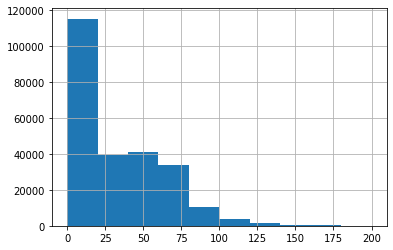

In [168]:
%matplotlib inline
part1['sum'].hist(range=[0,200])

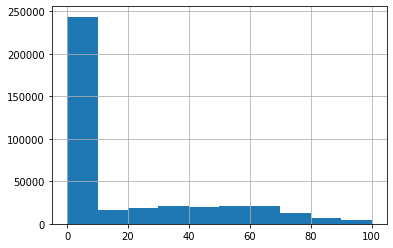

In [174]:
part1['sum'].fillna(0).hist(range=[0,100])

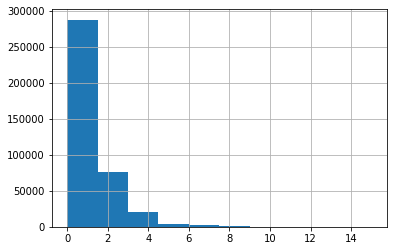

In [175]:
part1['count'].fillna(0).hist(range=[0,15])

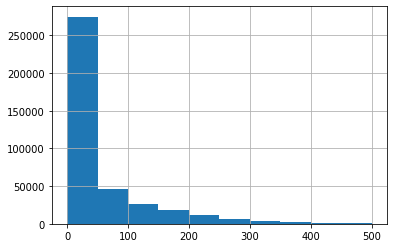

In [179]:
part1['totalruntime'].fillna(0).hist(range=[0,500])

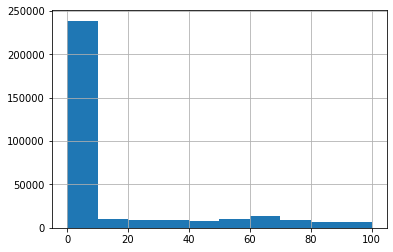

In [180]:
part1['totalruntime'].fillna(0).hist(range=[0,100])

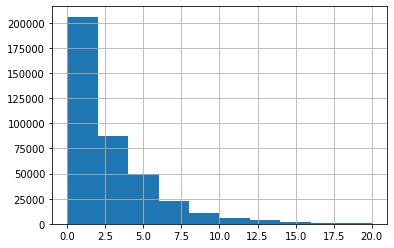

In [182]:
part1['runfreq'].fillna(0).hist(range=[0,20])

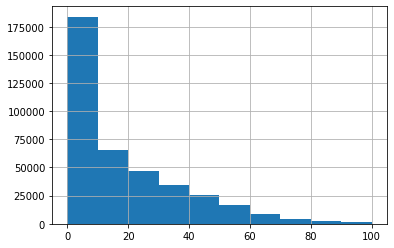

In [185]:
part1['chargefreq'].fillna(0).hist(range=[0,100])

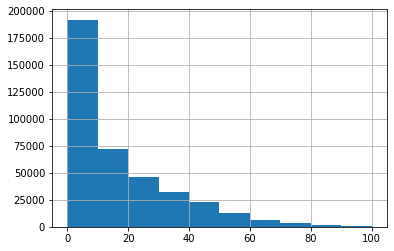

In [186]:
part1['dischargefreq'].fillna(0).hist(range=[0,100])

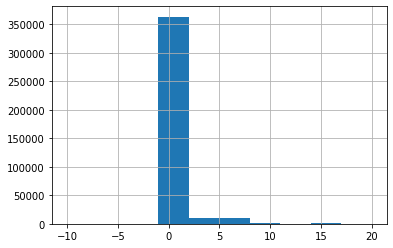

In [193]:
part1[part1['max_chargerate']!=np.inf]['max_chargerate'].hist(range=[-10,20])

In [194]:
part1[part1['max_chargerate']!=np.inf]['max_chargerate'].describe()

count    385708.000000
mean          0.476837
std           1.892280
min         -21.250000
25%           0.000000
50%           0.041322
75%           0.263158
max         100.000000
Name: max_chargerate, dtype: float64

In [197]:
part1.columns

Index(['OEM Model', 'DSN', 'level_2', 'sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'online', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#cl

In [196]:
part1.describe().T

,count,mean,std,min,25%,50%,75%,max
level_2,391371.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sum,246400.0,30.851546,31.572501,0.000000,1.000000,24.000000,54.750000,1195.000000
count,246400.0,1.657444,1.216440,1.000000,1.000000,1.200000,2.000000,69.000000
No Dustbox Error,28323.0,1.705893,9.373425,1.000000,1.000000,1.000000,2.000000,1005.000000
totalruntime,391371.0,47.281975,83.933093,0.000000,0.000000,2.000000,64.000000,1679.000000
runfreq,391371.0,2.425233,3.640258,0.000000,0.000000,1.000000,4.000000,267.000000
online,391371.0,7845.727122,1857.691380,0.000000,8058.316667,8440.666667,8849.141667,8930.500000
chargefreq,391371.0,20.136931,69.459631,0.000000,1.000000,11.000000,29.000000,2971.000000
dischargefreq,391371.0,18.307460,66.530235,0.000000,1.000000,10.000000,25.000000,2983.000000
max_chargerate,391371.0,inf,NaN,-21.250000,0.000016,0.041667,0.277778,inf


In [332]:
part1['DSN'].isin(returns['DSN'].unique()).sum()

201

In [339]:
part1['returned']=np.where(part1['DSN'].isin(returns['DSN'].unique()),'returned','not returned')

In [340]:
part1.groupby(['OEM Model','returned']).size()

OEM Model  returned    
RV1000     not returned    20096
           returned            8
RV1000A    not returned    88701
           returned          193
RV750      not returned    81566
RV750L     not returned    46031
RV750N     not returned    72746
RV750R     not returned       24
RV850      not returned    76713
RV871      not returned     5293
dtype: int64

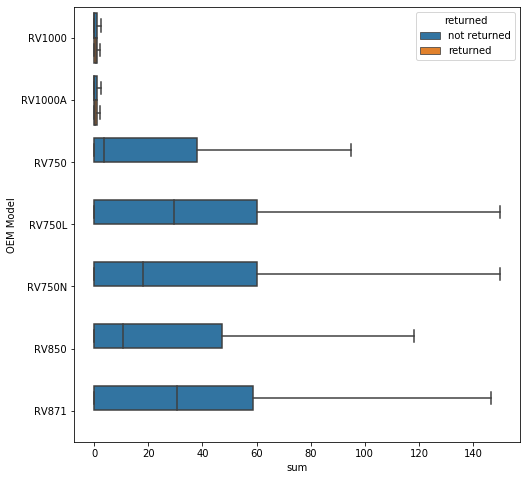

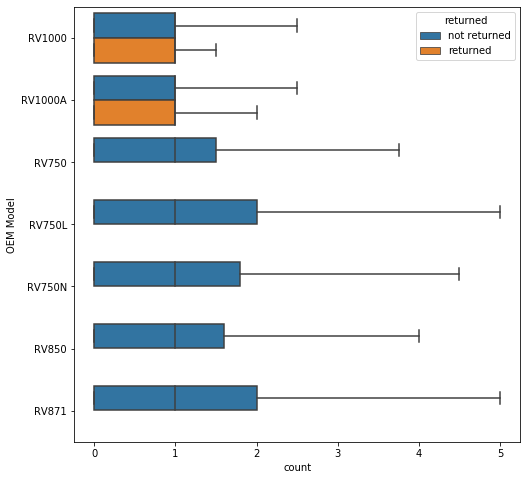

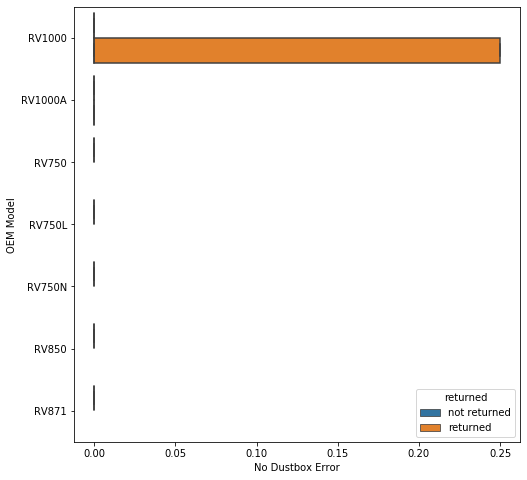

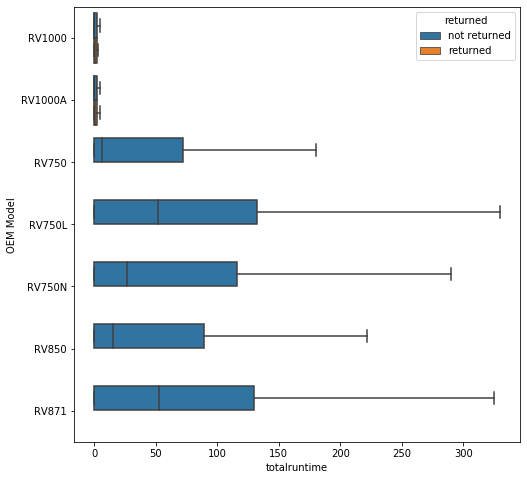

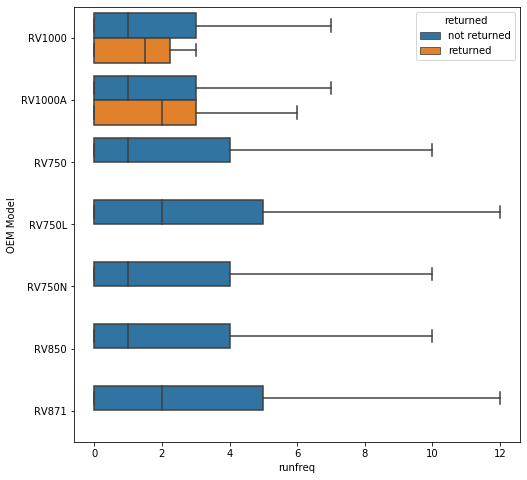

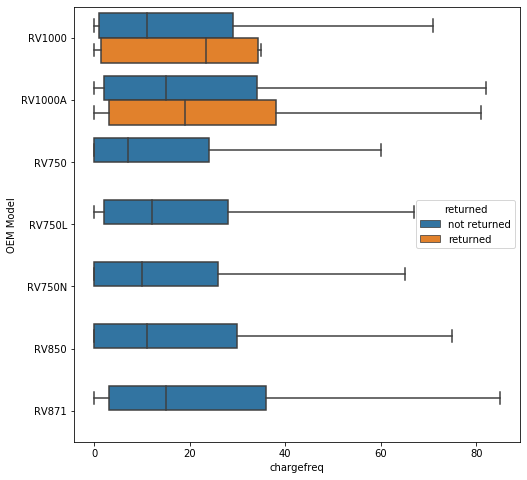

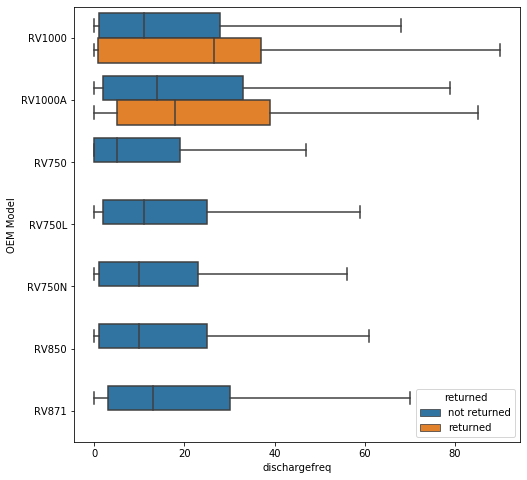

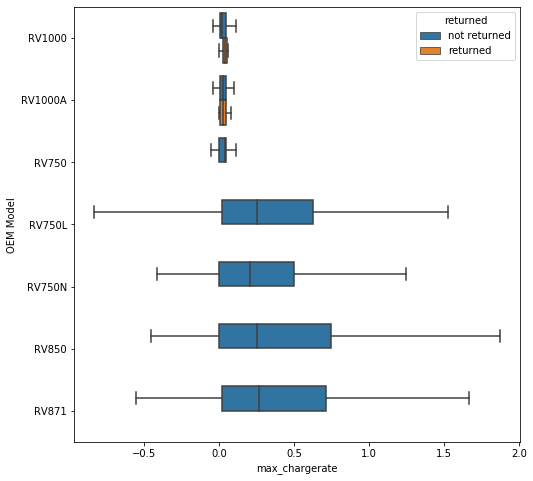

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


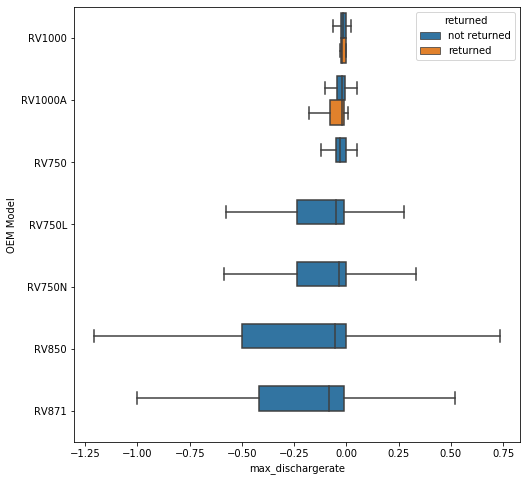

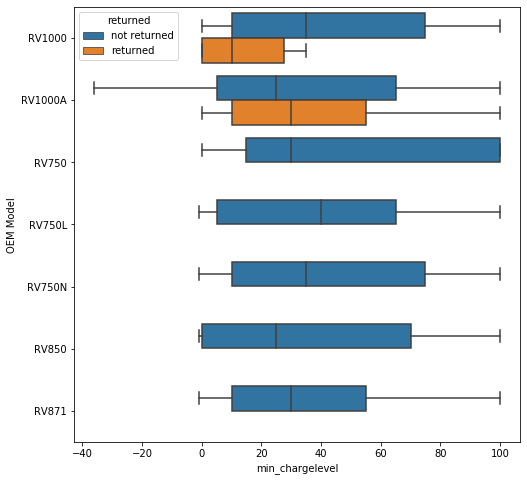

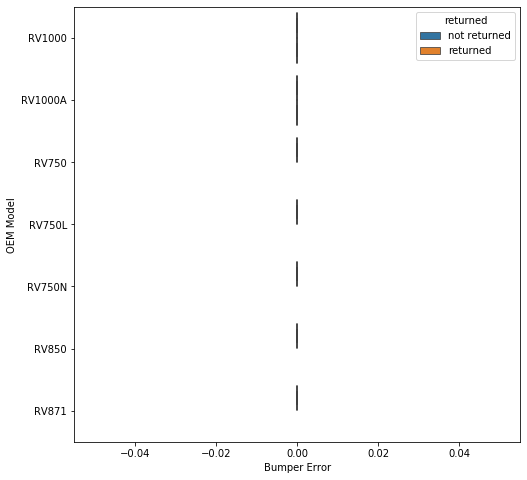

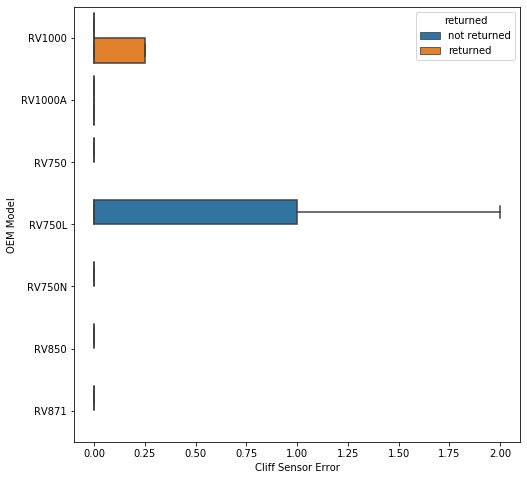

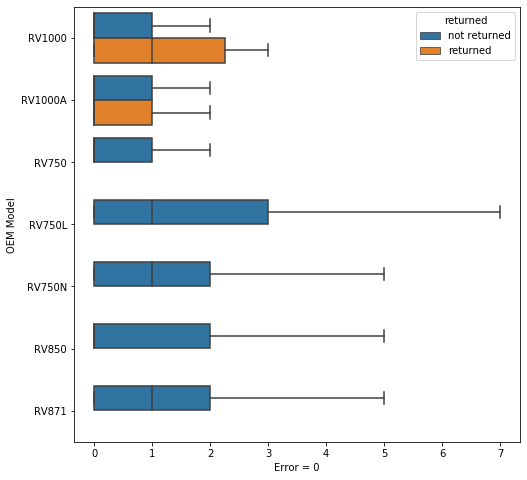

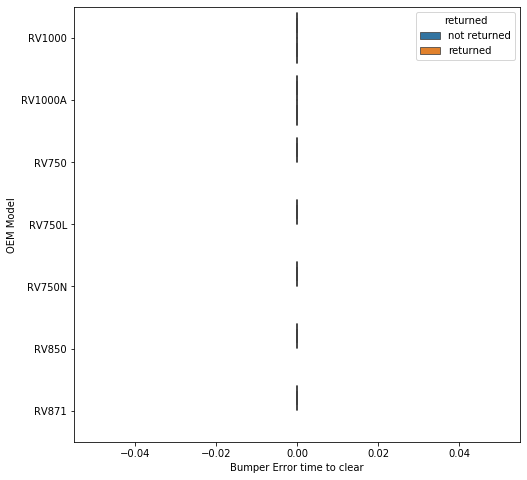

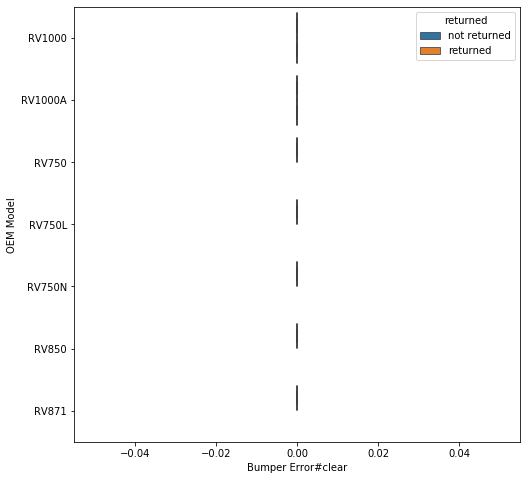

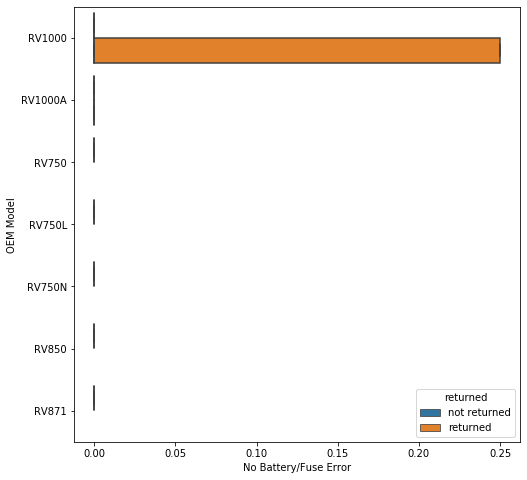

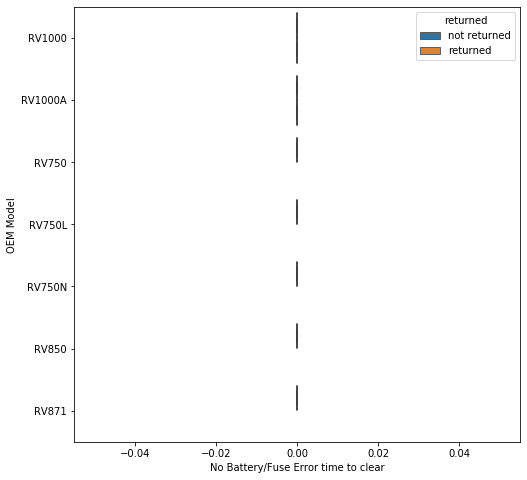

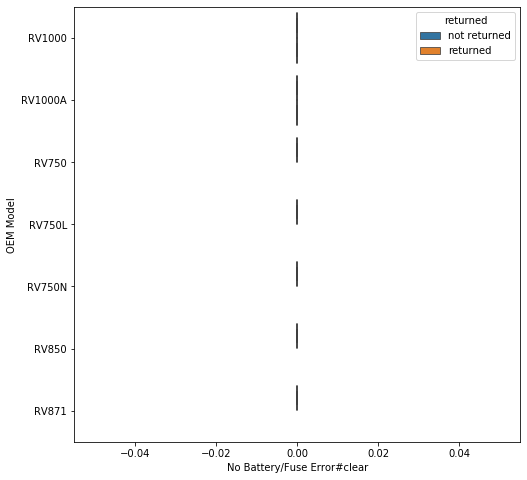

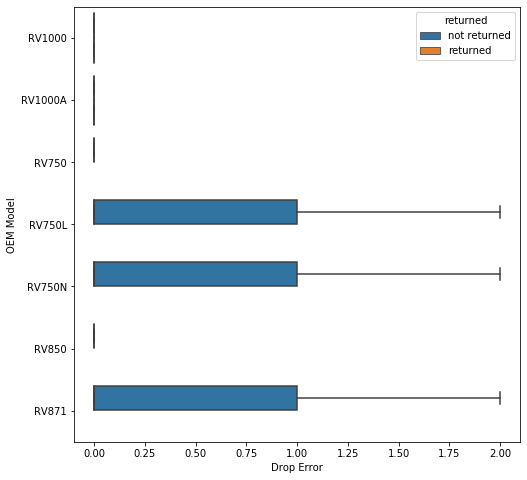

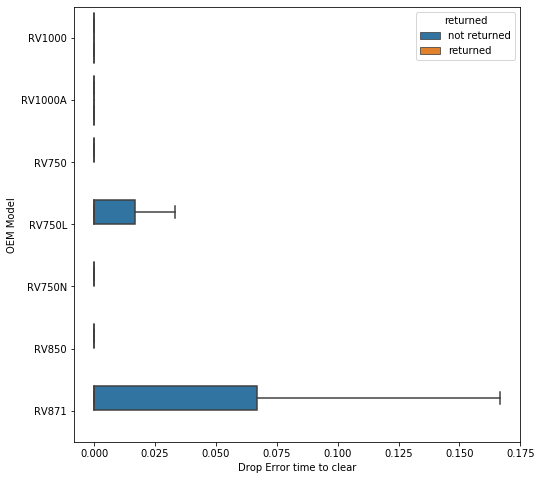

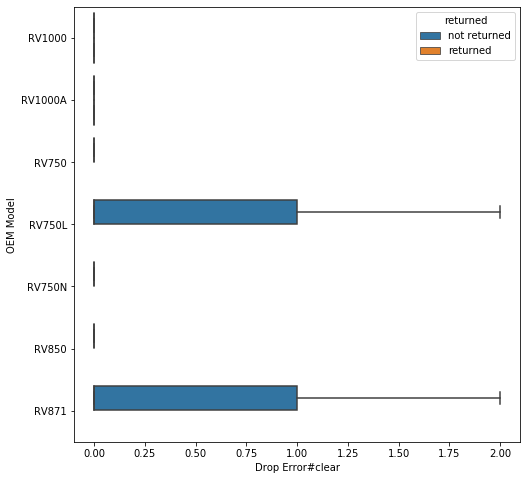

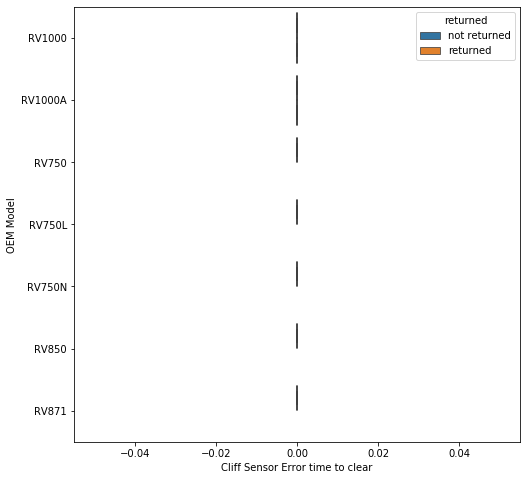

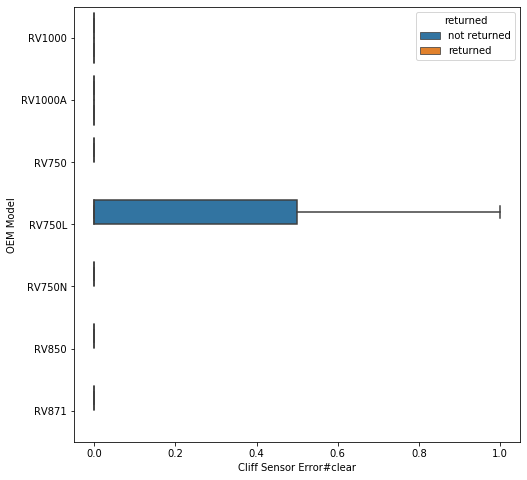

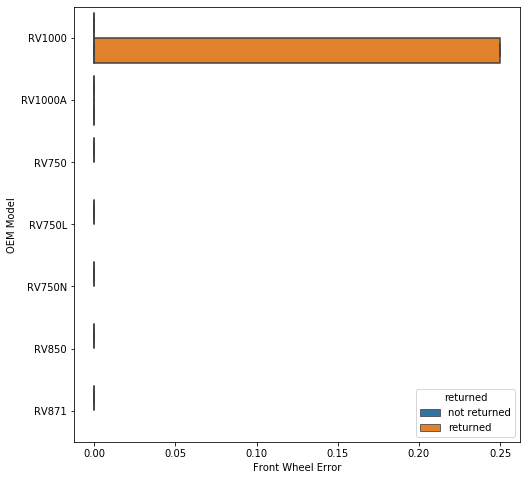

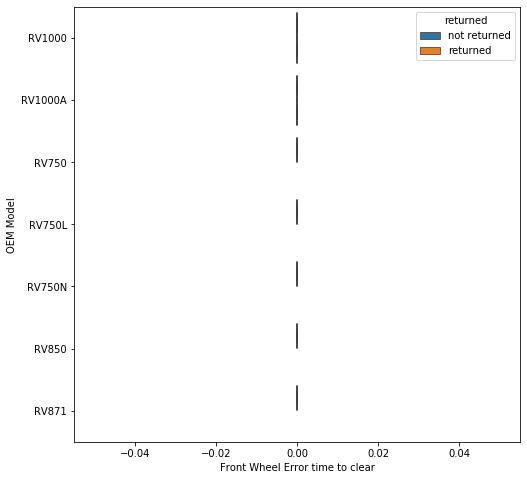

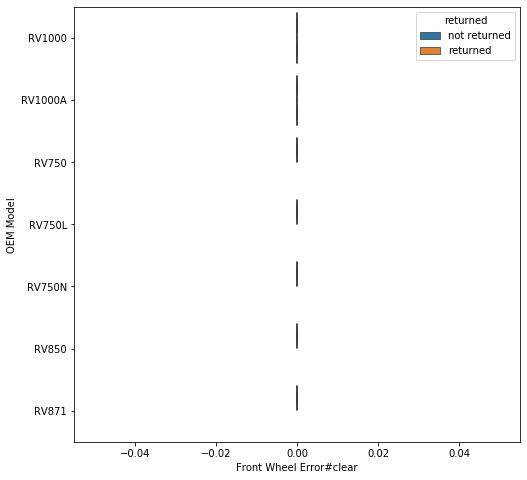

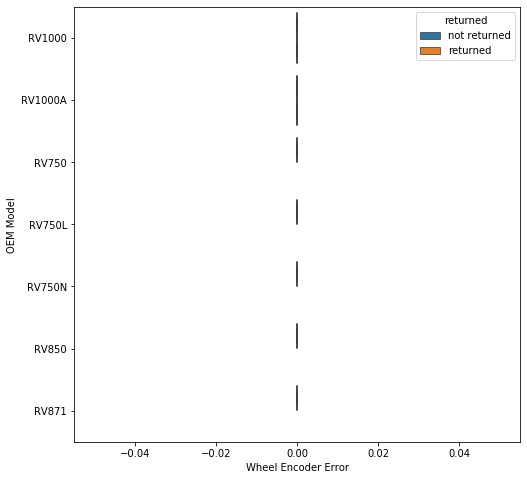

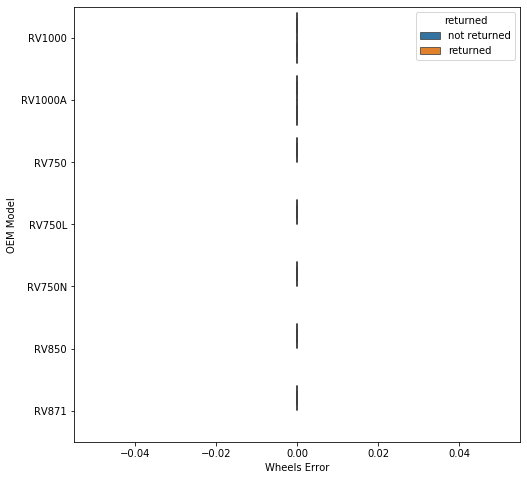

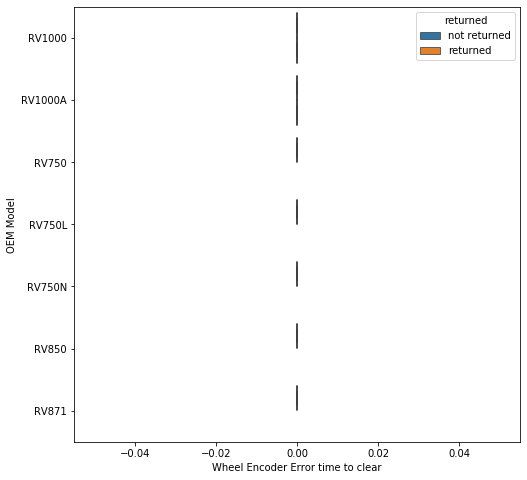

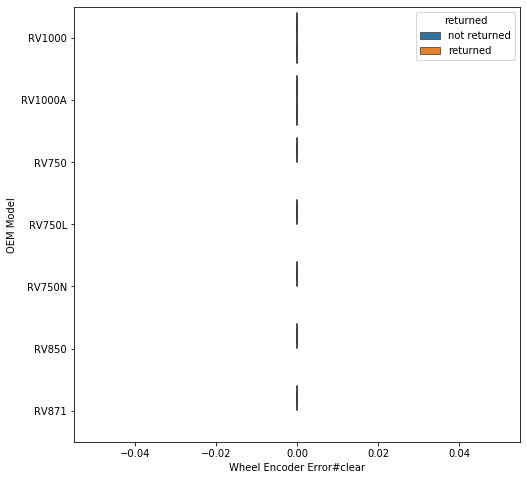

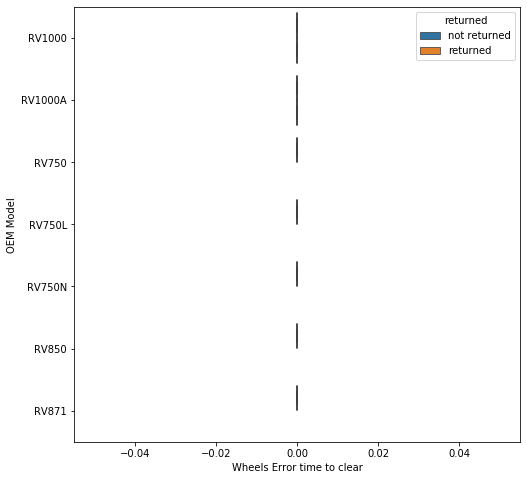

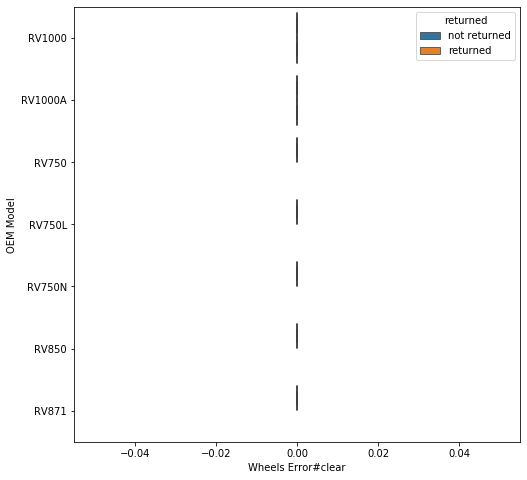

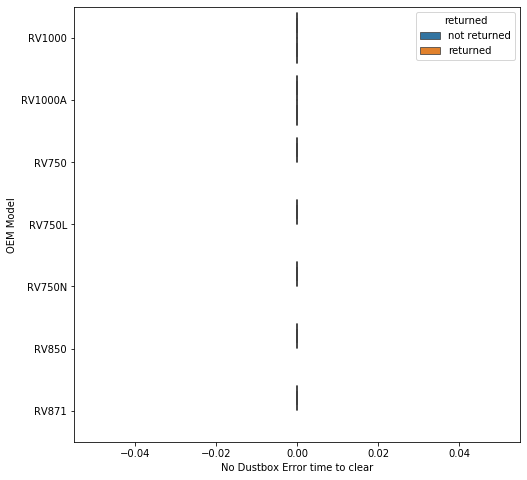

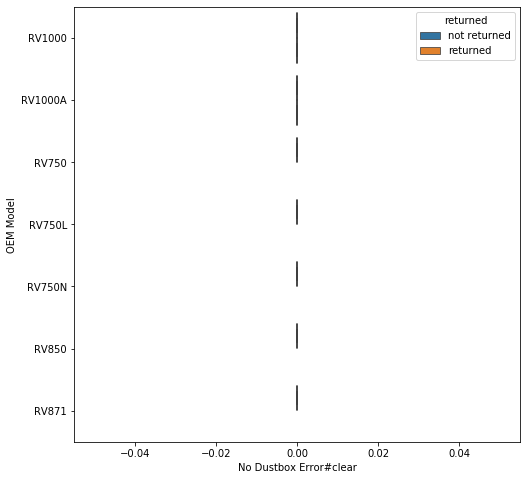

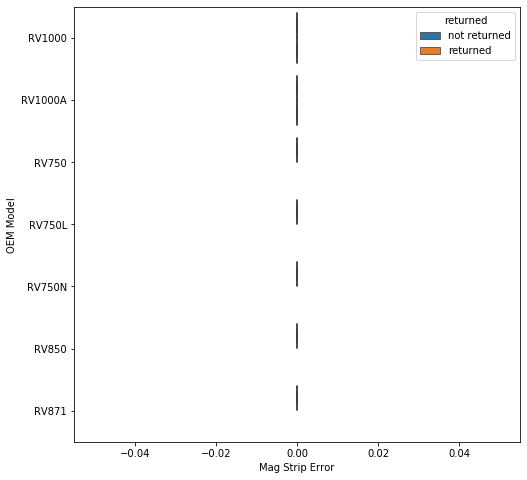

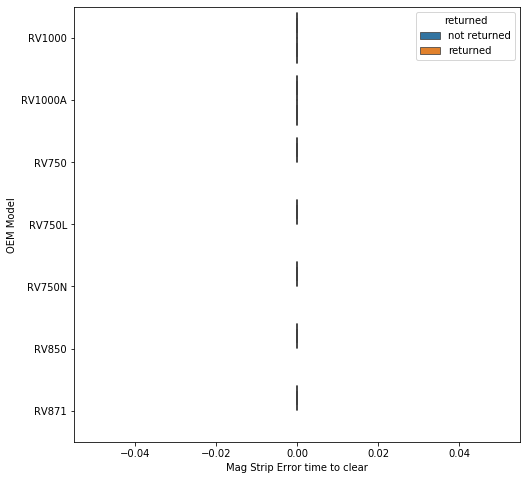

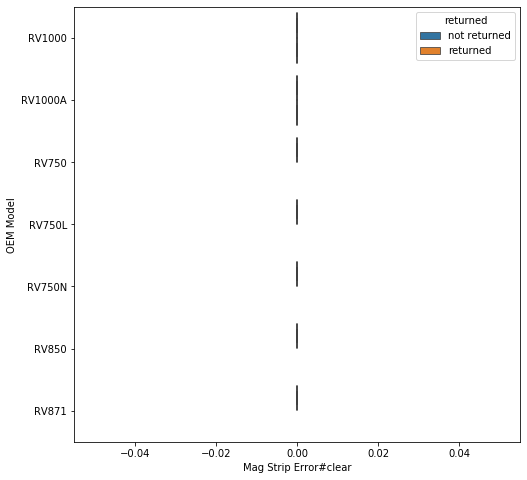

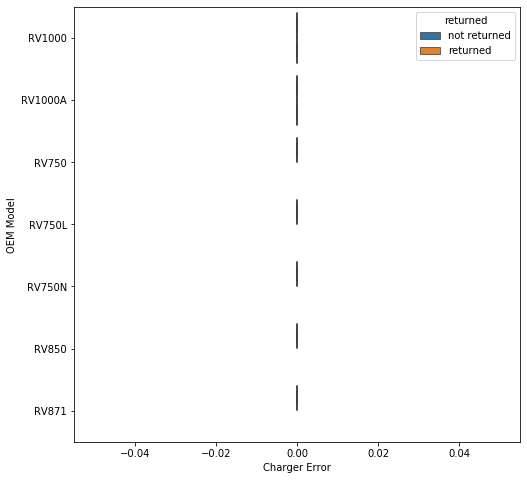

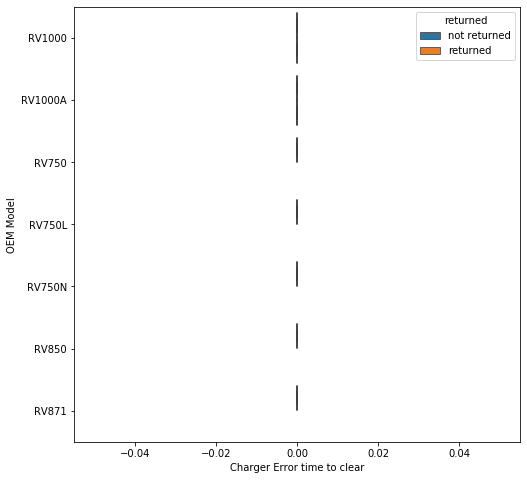

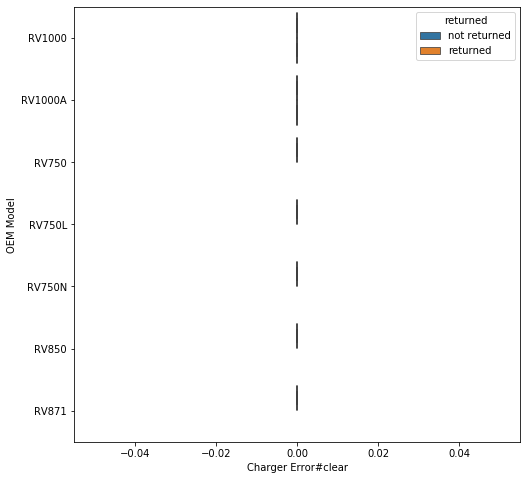

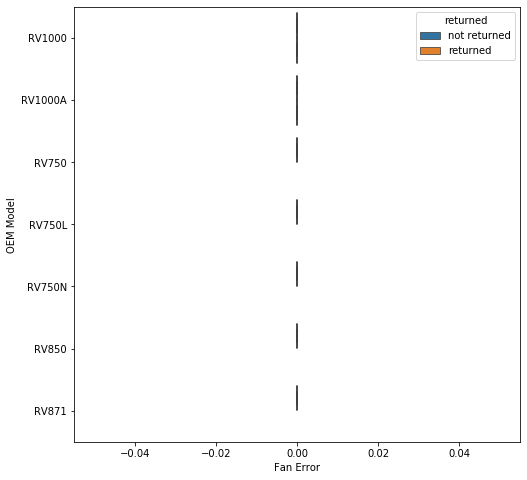

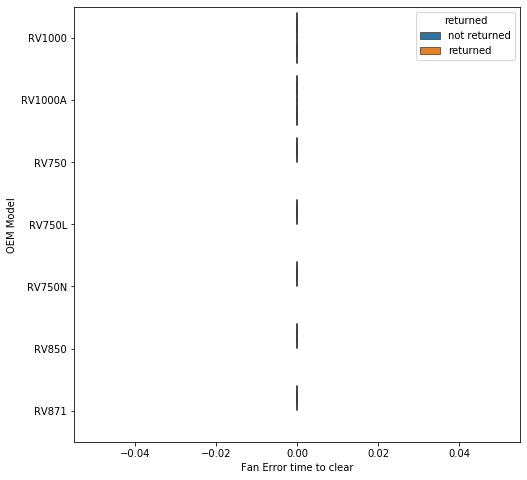

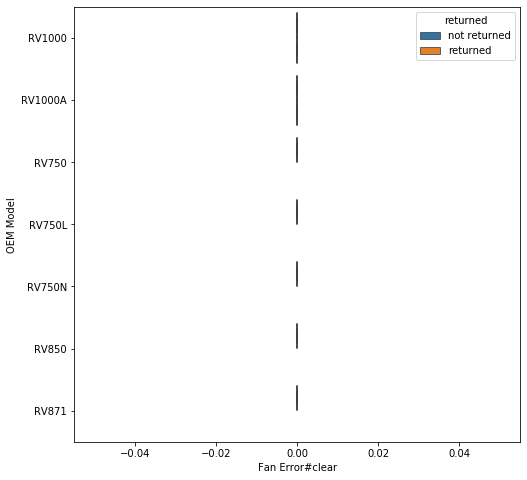

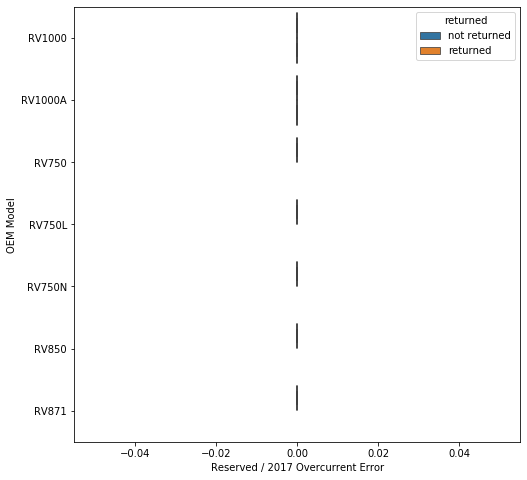

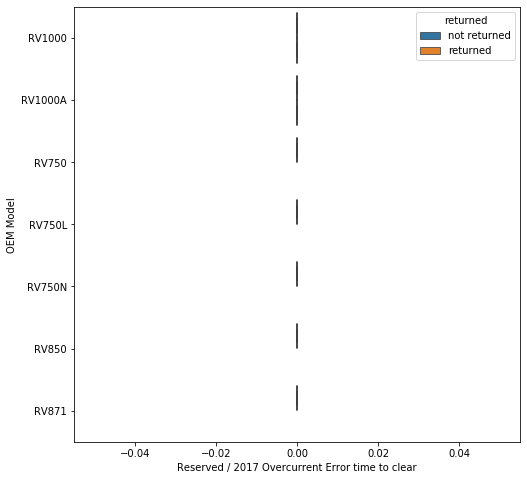

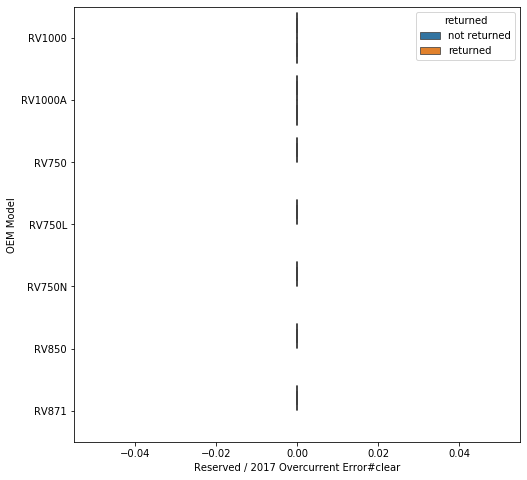

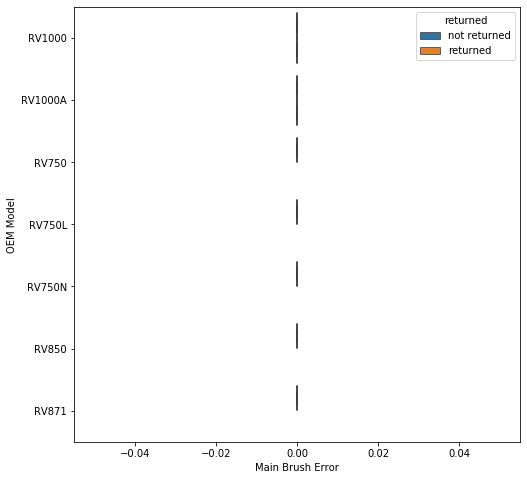

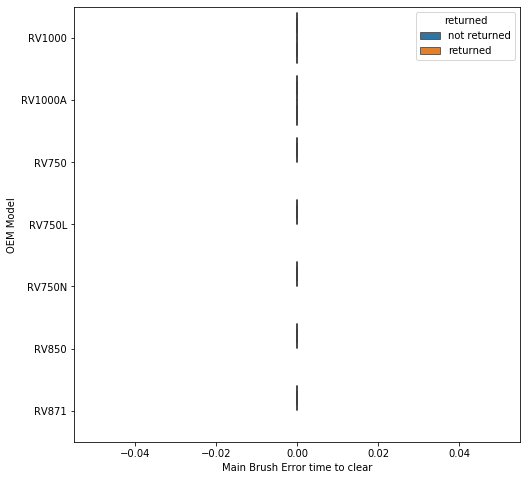

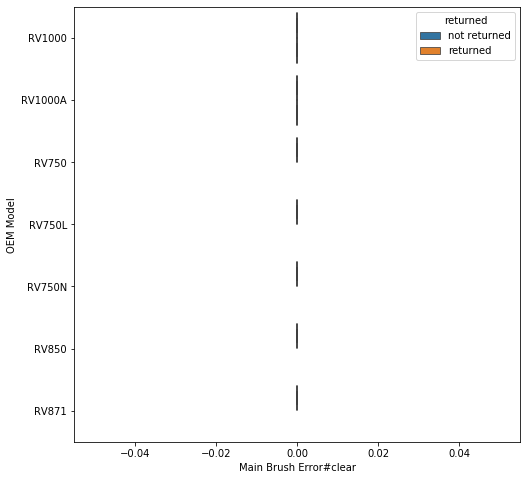

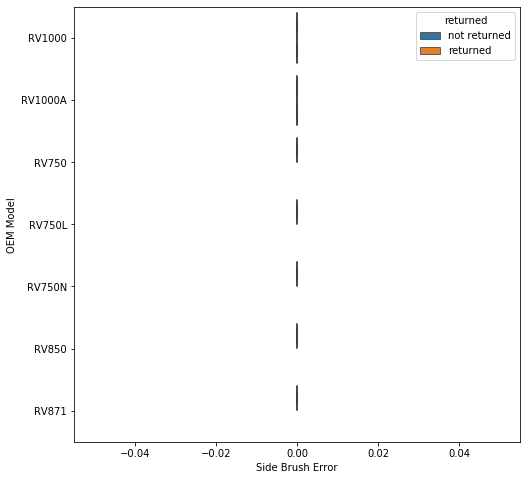

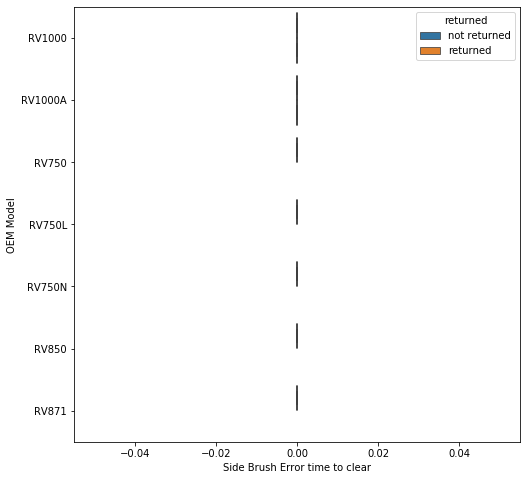

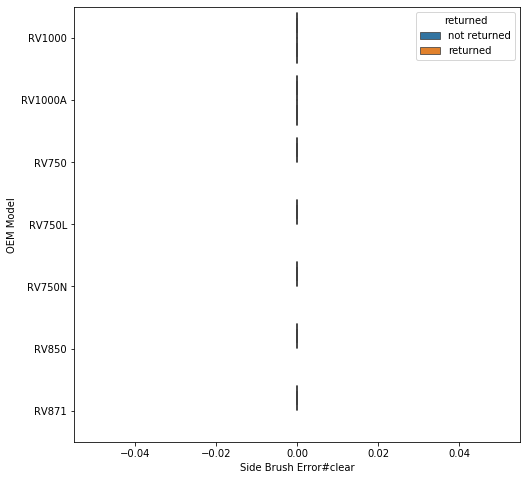

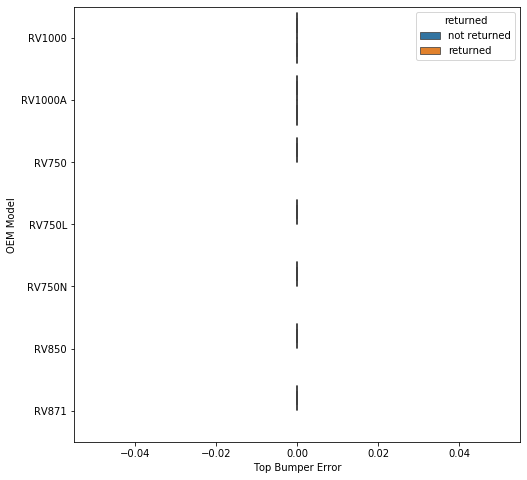

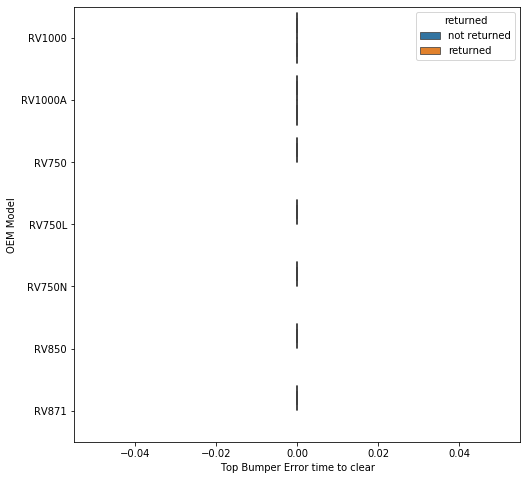

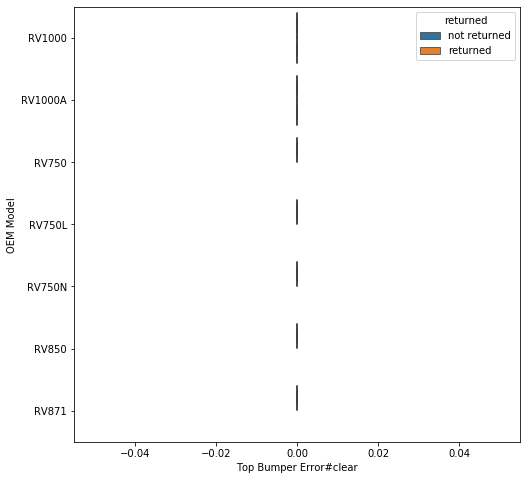

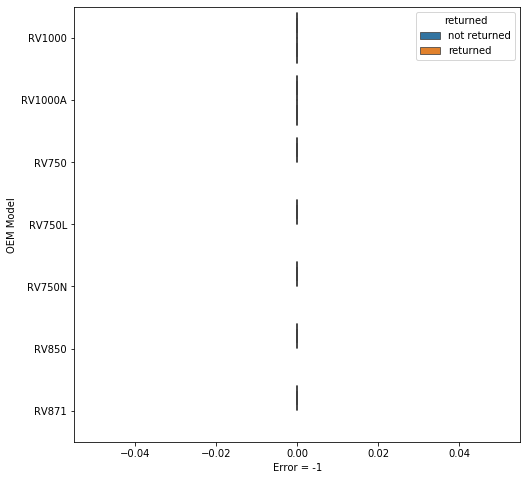

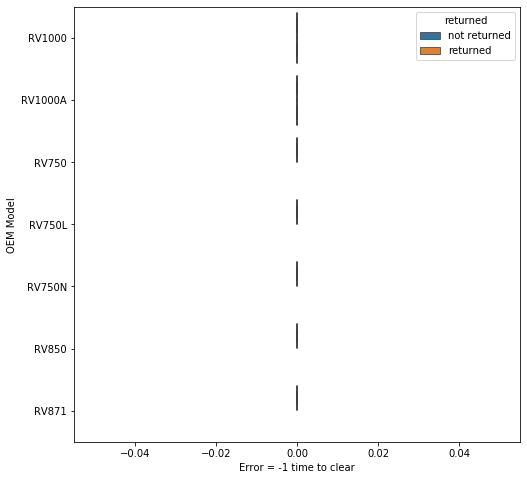

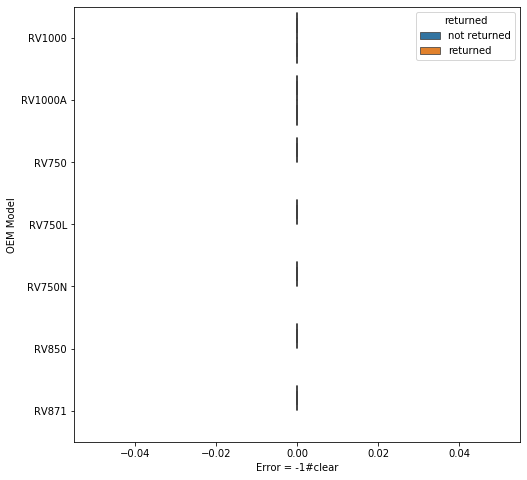

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in ['sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#clear', 'Charger Error', 'Charger Error time to clear',
       'Charger Error#clear', 'Fan Error', 'Fan Error time to clear',
       'Fan Error#clear', 'Reserved / 2017 Overcurrent Error',
       'Reserved / 2017 Overcurrent Error time to clear',
       'Reserved / 2017 Overcurrent Error#clear', 'Main Brush Error',
       'Main Brush Error time to clear', 'Main Brush Error#clear',
       'Side Brush Error', 'Side Brush Error time to clear',
       'Side Brush Error#clear', 'Top Bumper Error',
       'Top Bumper Error time to clear', 'Top Bumper Error#clear',
       'Error = -1', 'Error = -1 time to clear', 'Error = -1#clear']:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=i,y='OEM Model',hue='returned',data=part1[(part1['OEM Model']!='RV750R')].fillna(0),showfliers=False)
    plt.show()

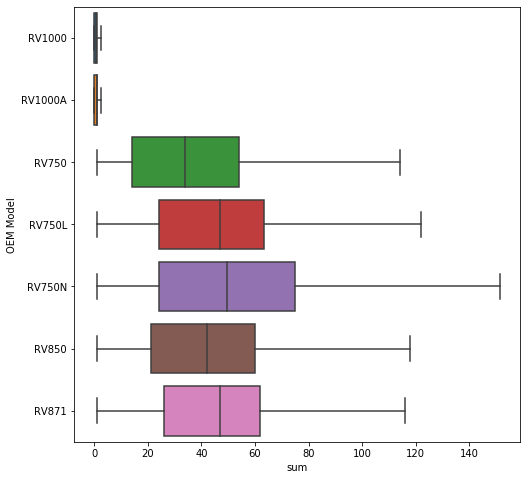

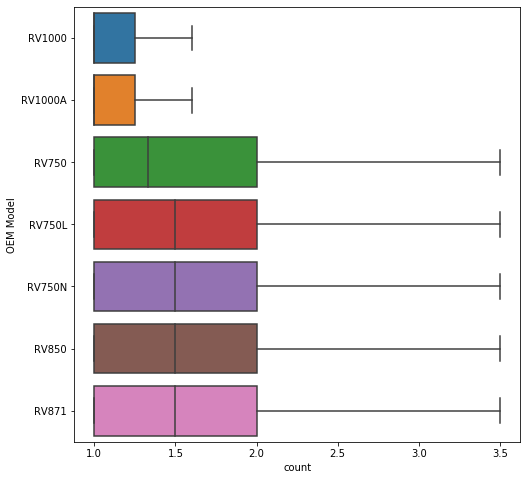

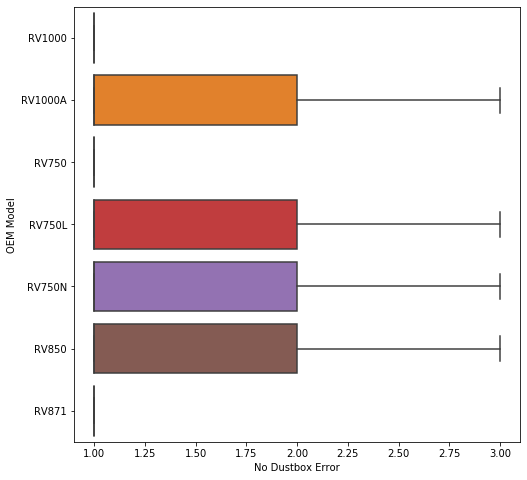

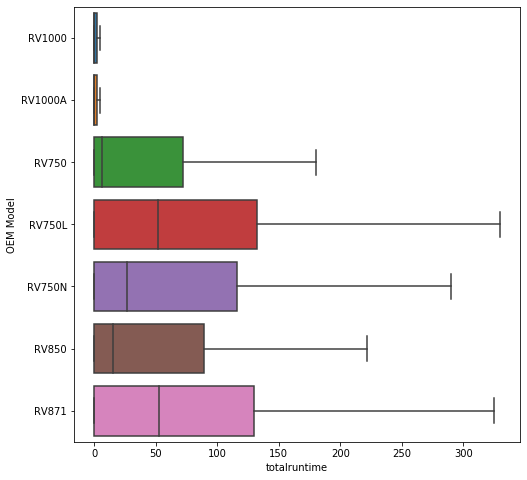

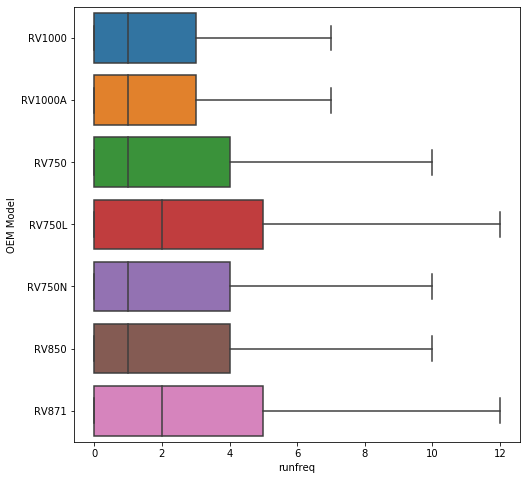

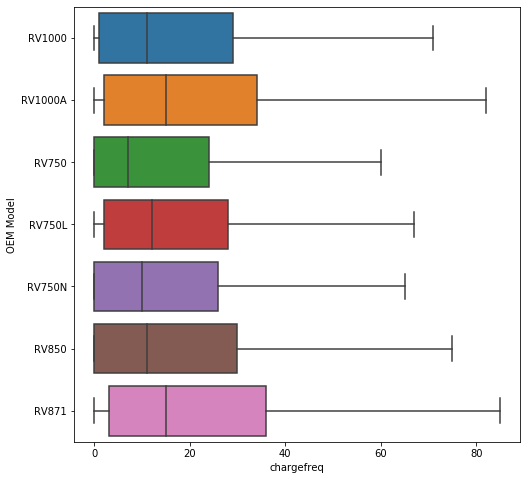

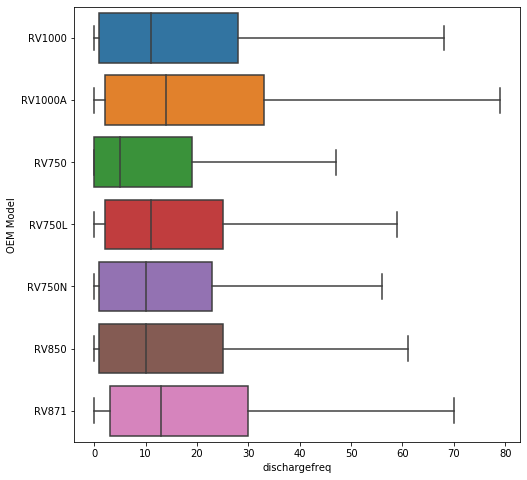

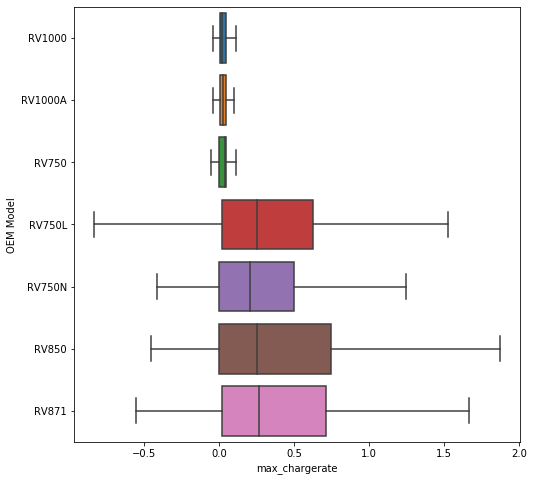

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


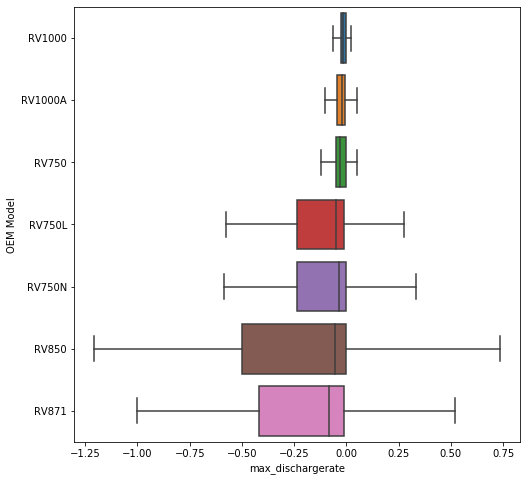

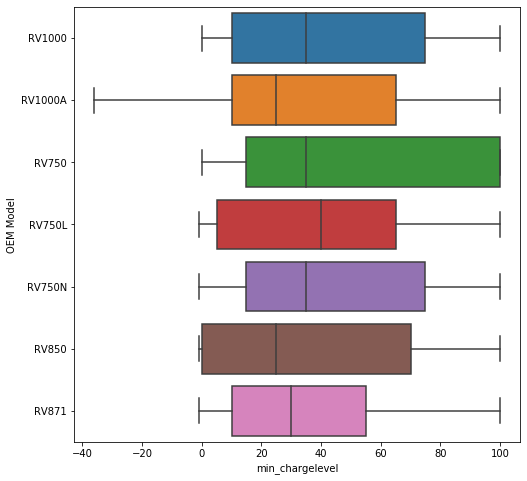

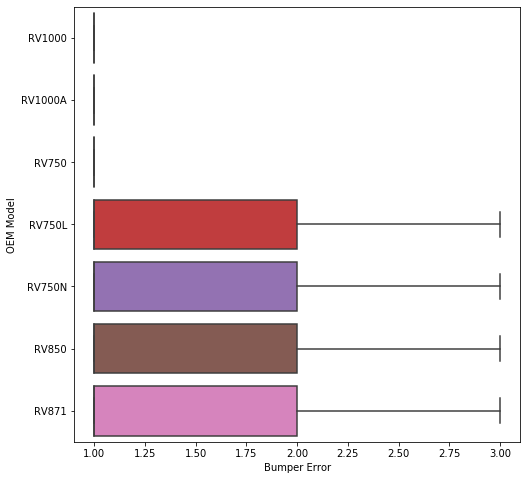

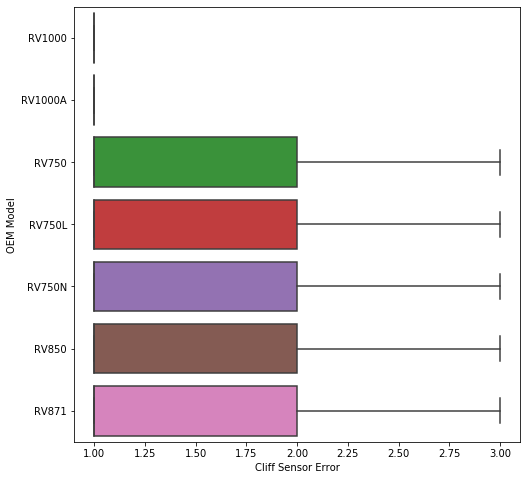

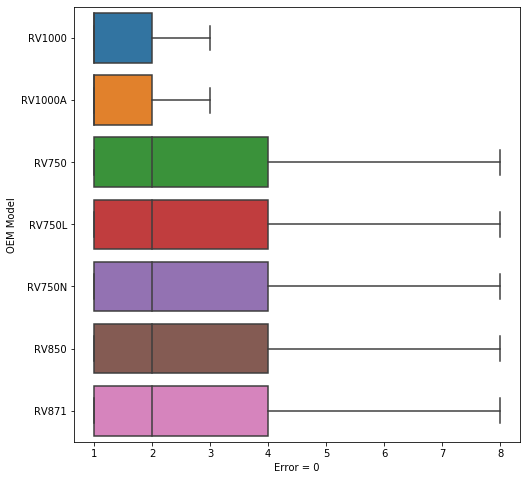

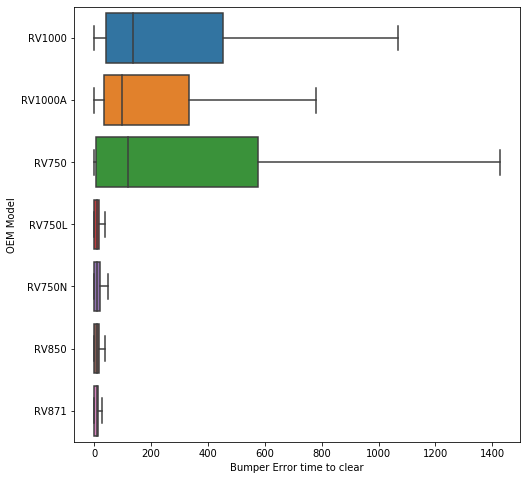

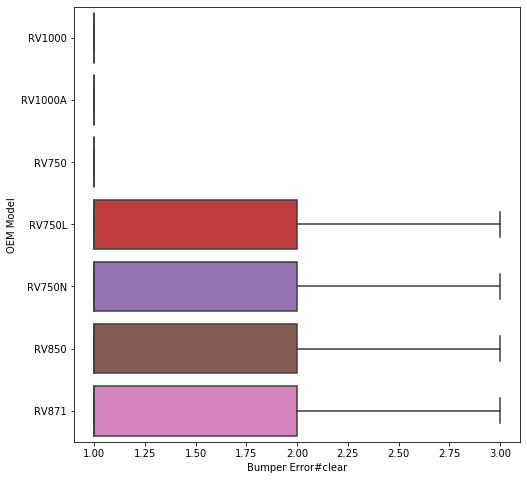

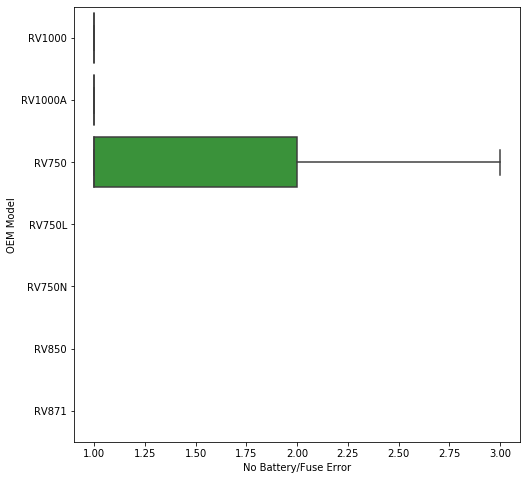

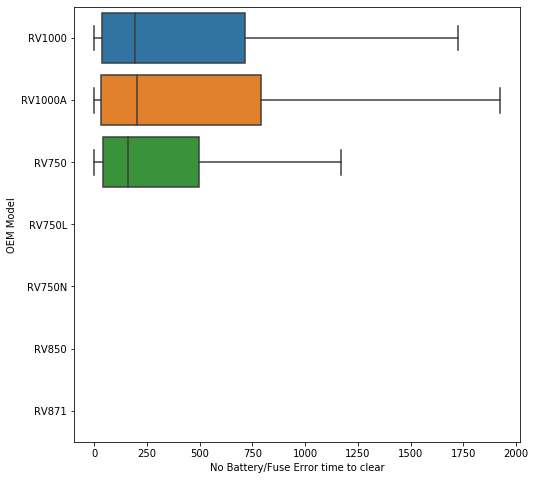

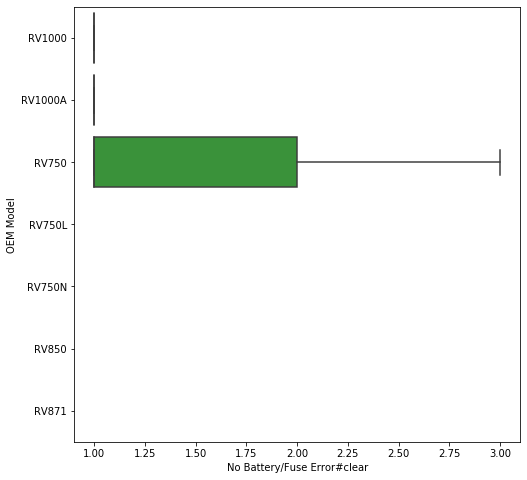

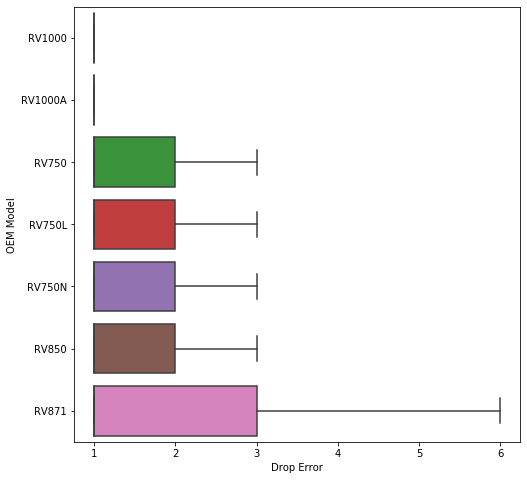

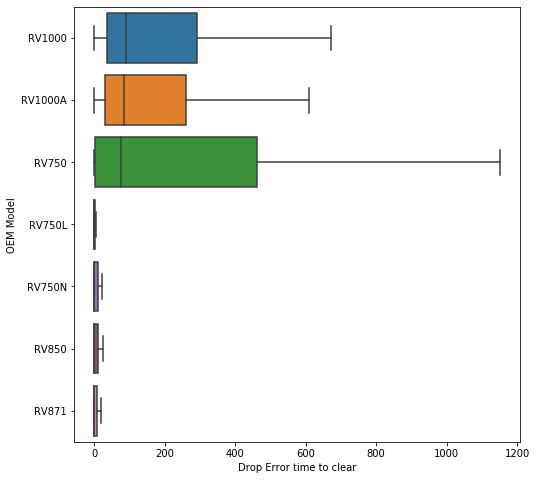

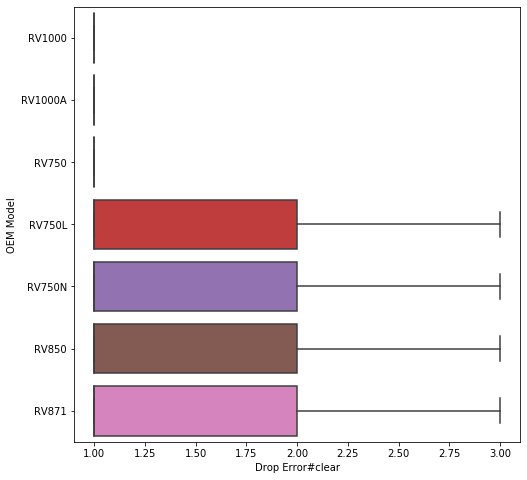

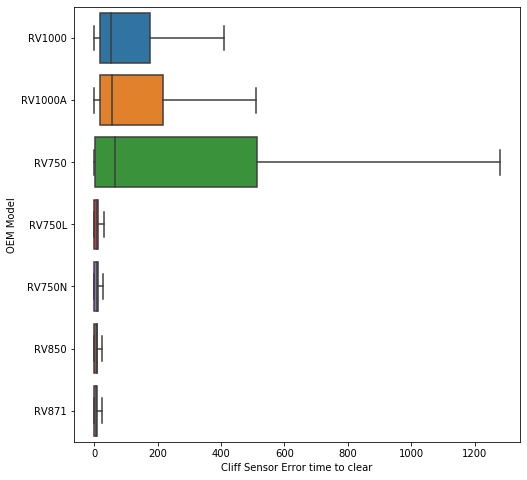

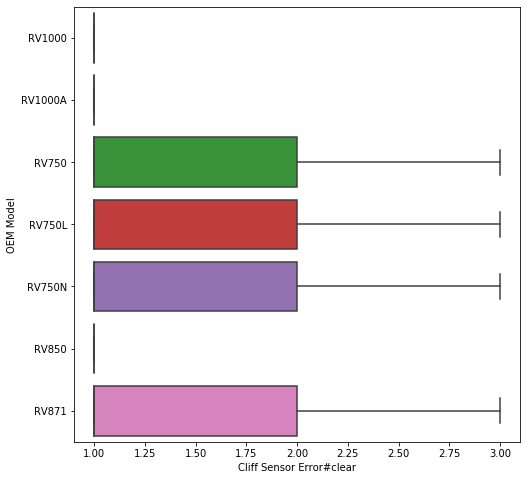

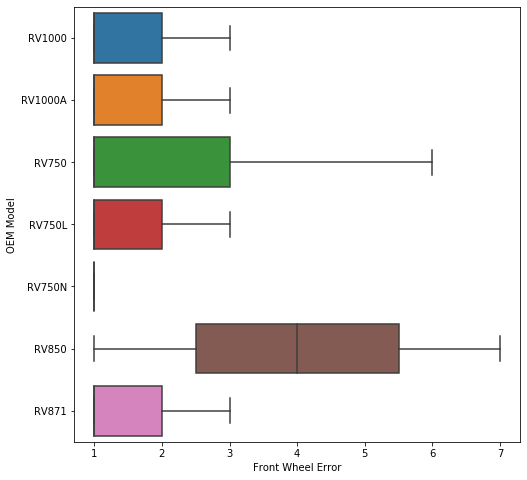

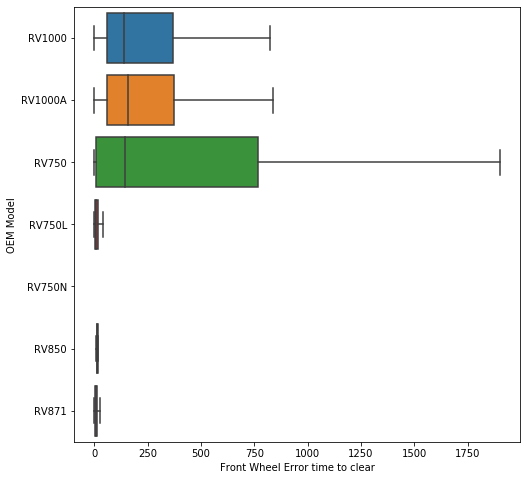

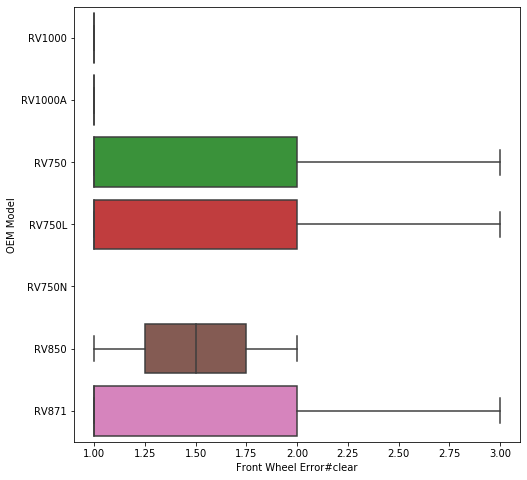

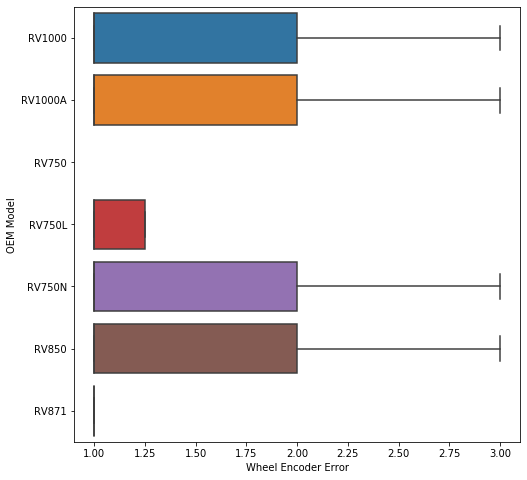

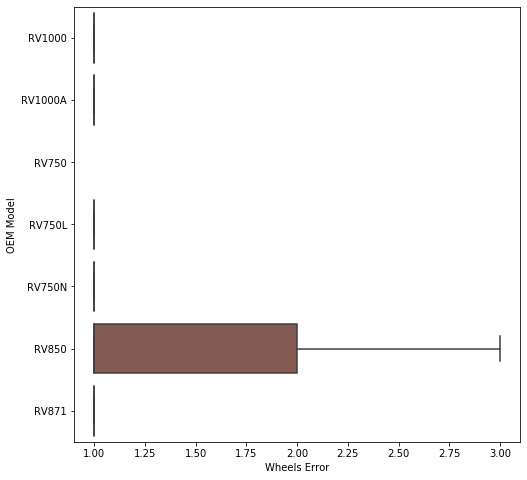

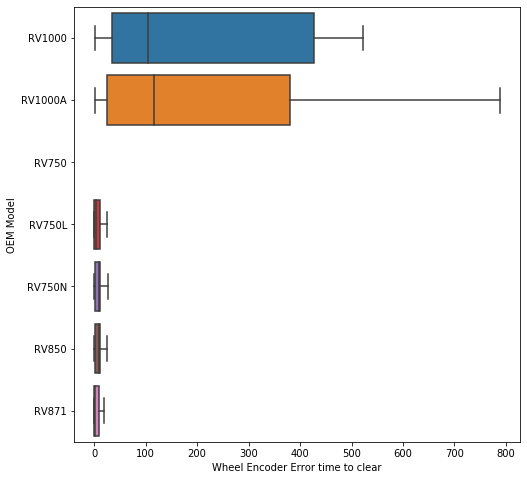

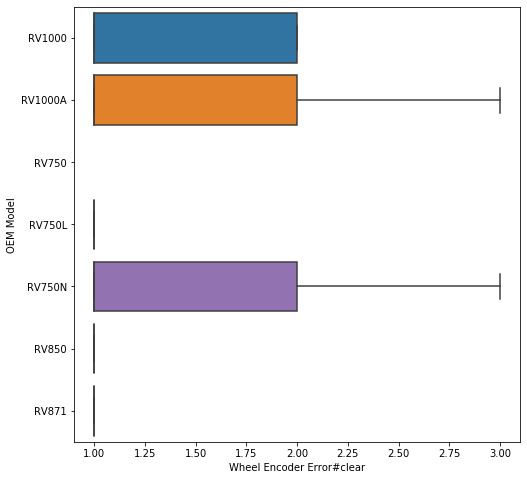

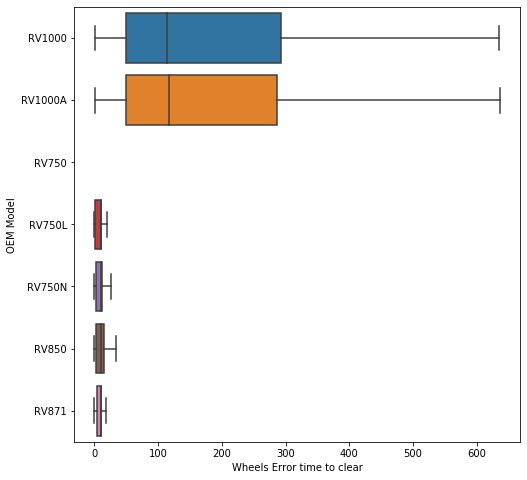

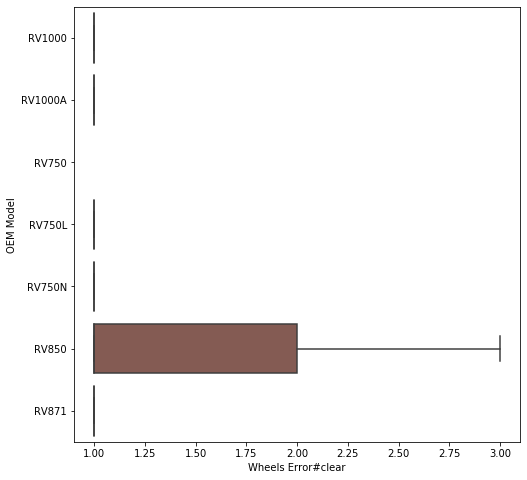

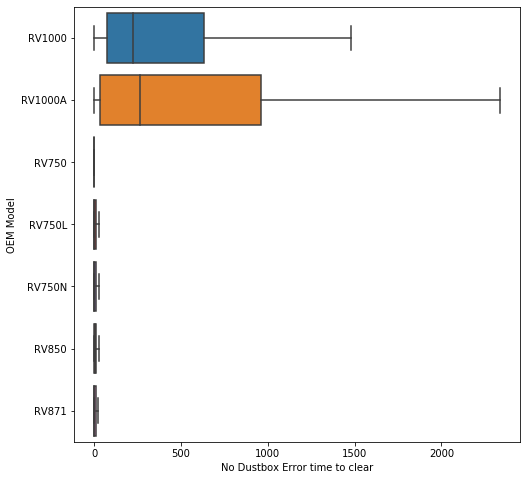

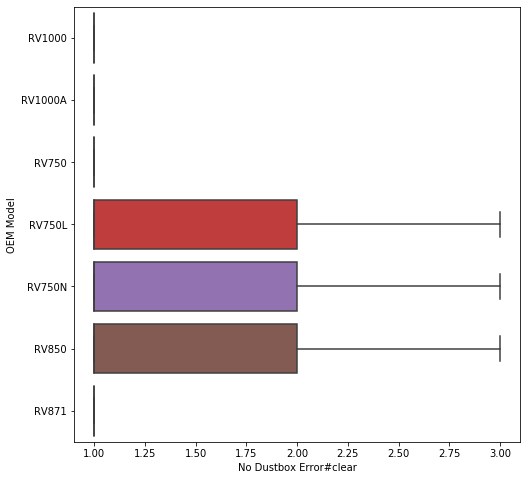

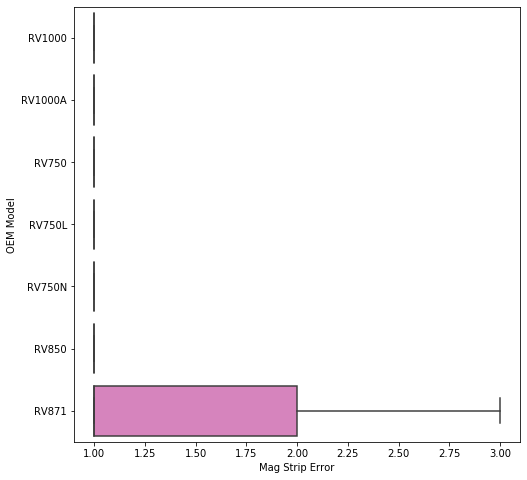

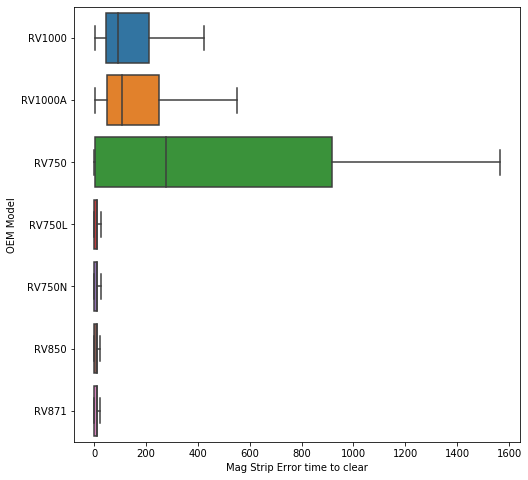

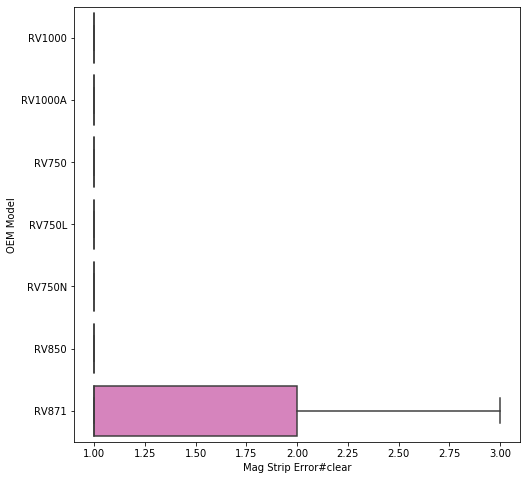

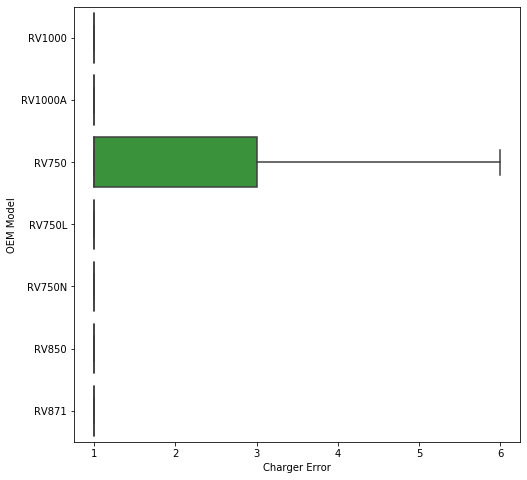

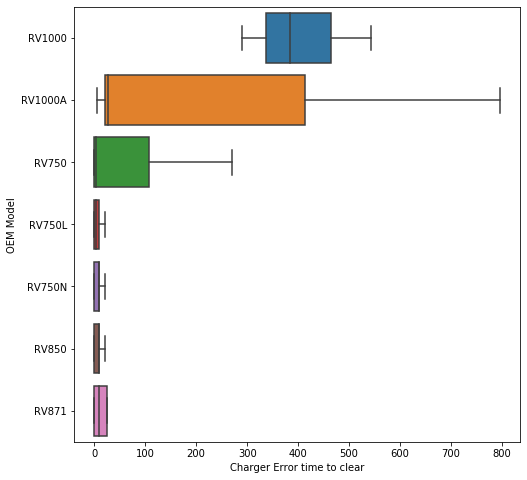

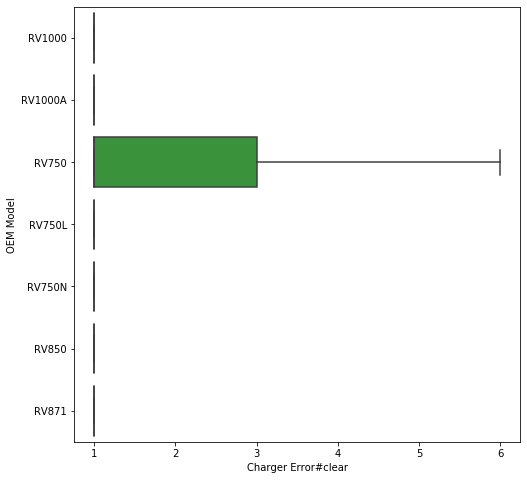

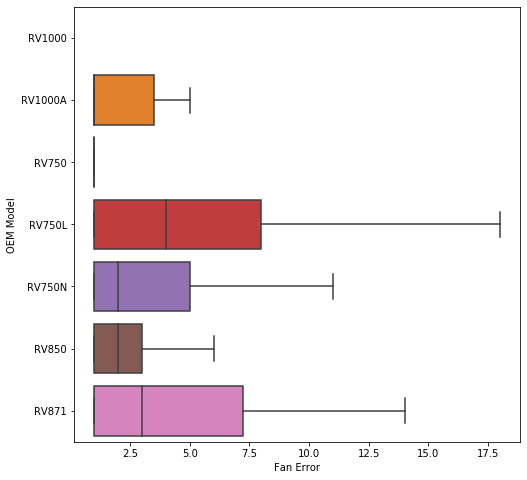

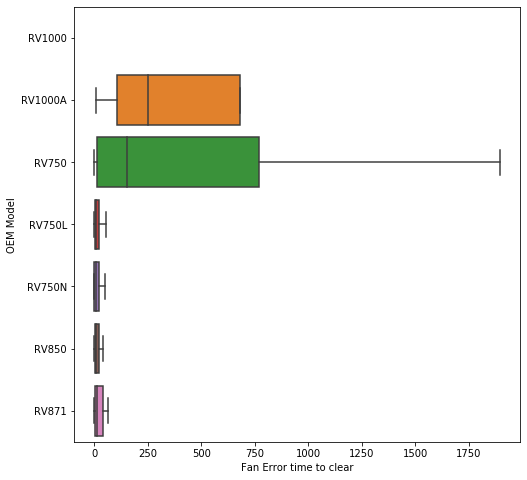

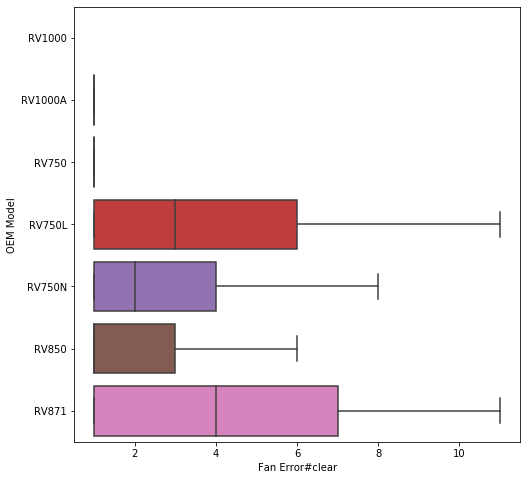

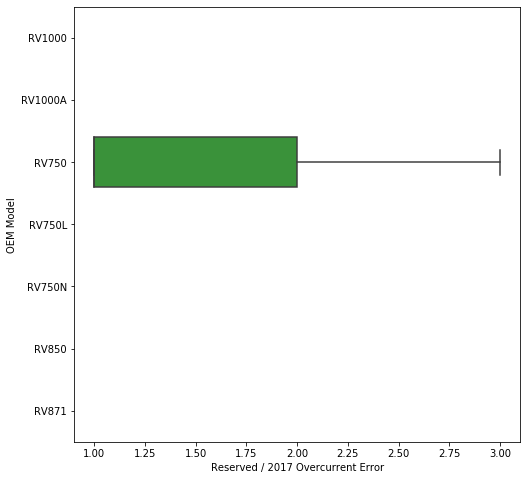

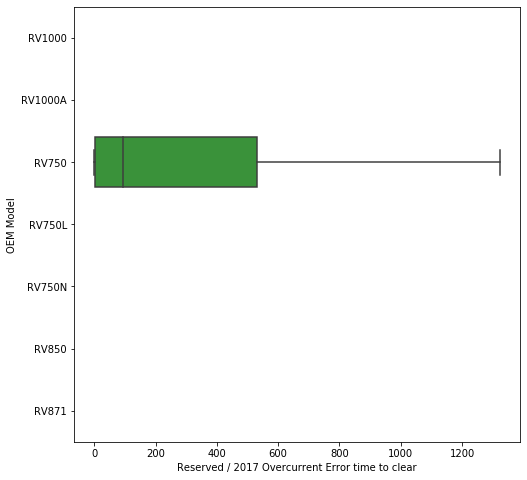

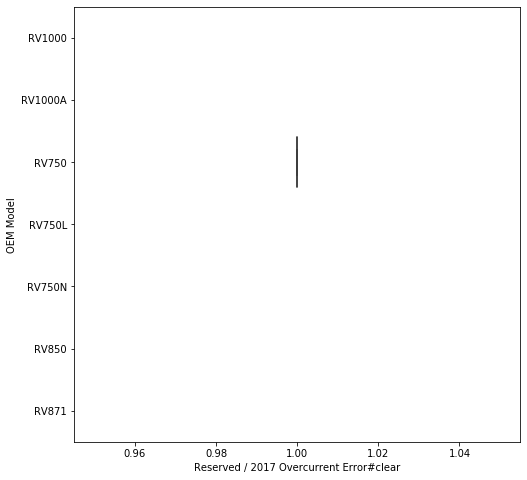

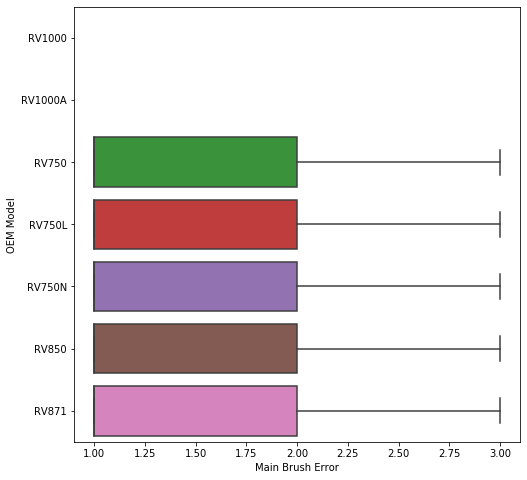

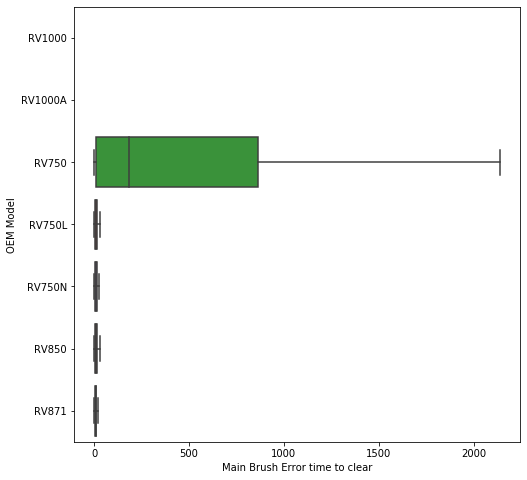

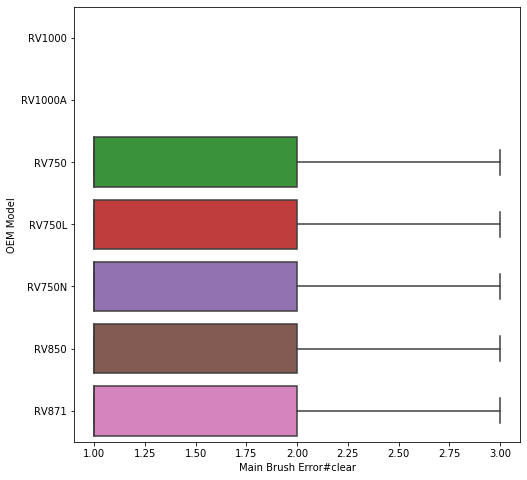

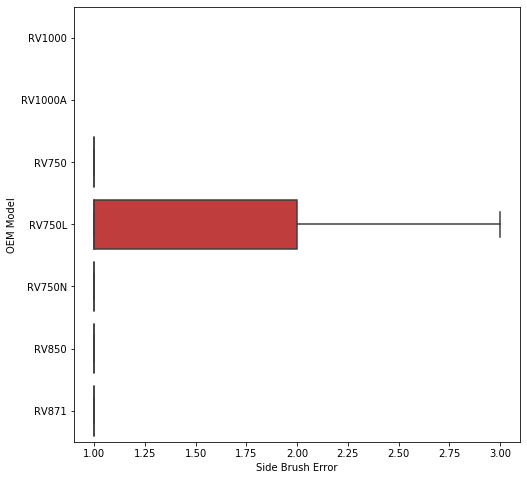

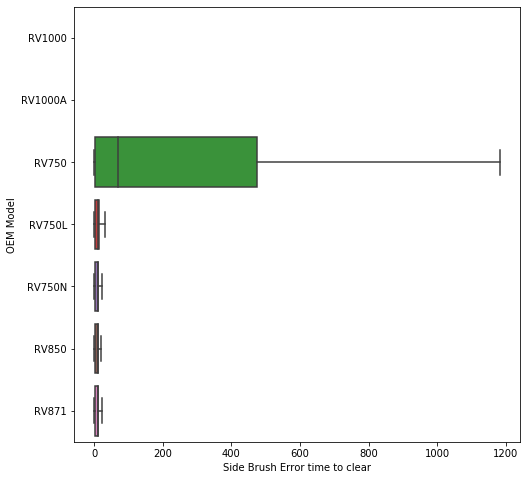

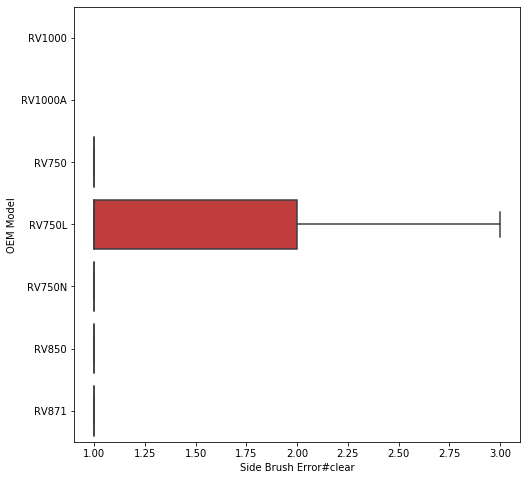

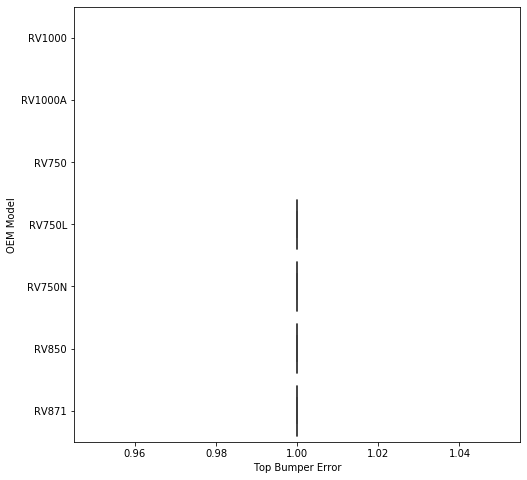

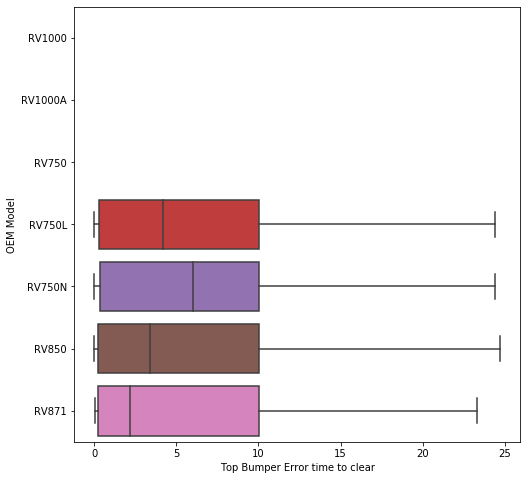

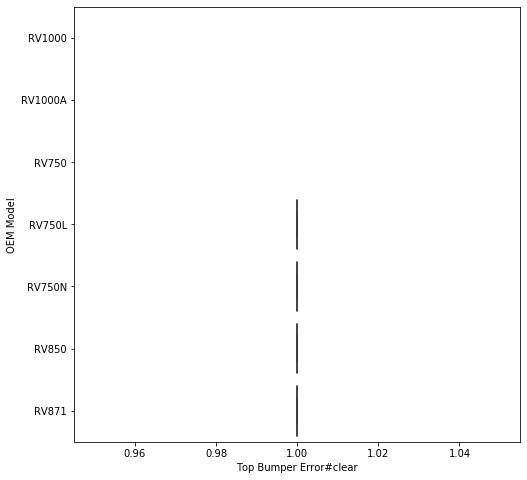

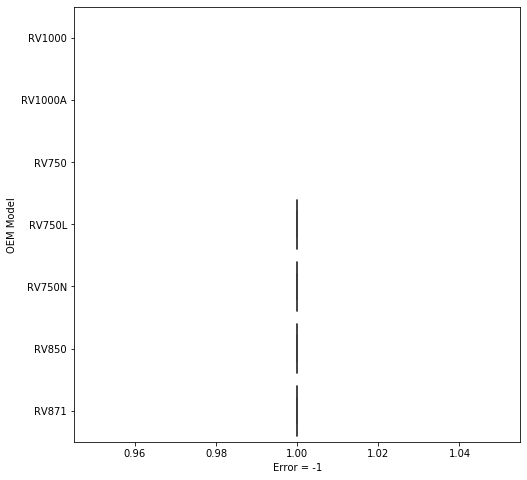

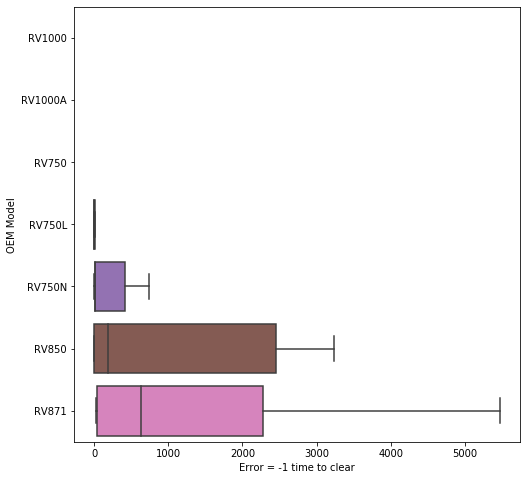

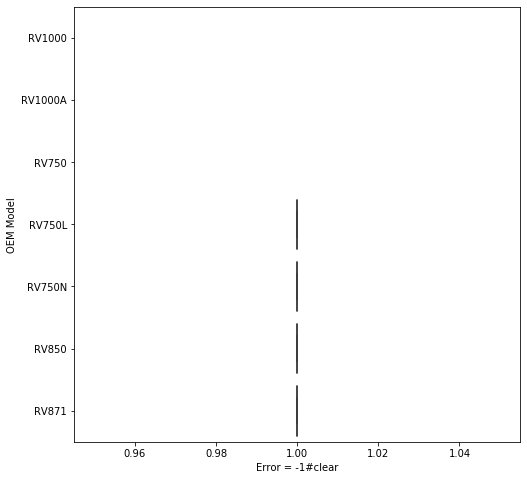

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in ['sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#clear', 'Charger Error', 'Charger Error time to clear',
       'Charger Error#clear', 'Fan Error', 'Fan Error time to clear',
       'Fan Error#clear', 'Reserved / 2017 Overcurrent Error',
       'Reserved / 2017 Overcurrent Error time to clear',
       'Reserved / 2017 Overcurrent Error#clear', 'Main Brush Error',
       'Main Brush Error time to clear', 'Main Brush Error#clear',
       'Side Brush Error', 'Side Brush Error time to clear',
       'Side Brush Error#clear', 'Top Bumper Error',
       'Top Bumper Error time to clear', 'Top Bumper Error#clear',
       'Error = -1', 'Error = -1 time to clear', 'Error = -1#clear']:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=i,y='OEM Model',data=part1[part1['OEM Model']!='RV750R'],showfliers=False)
    plt.show()

In [202]:
part1['OEM Model']!='RV750R'.value_counts()

RV1000A    88894
RV750      81566
RV850      76713
RV750N     72746
RV750L     46031
RV1000     20104
RV871       5293
RV750R        24
Name: OEM Model, dtype: int64

In [221]:
part1.columns

Index(['OEM Model', 'DSN', 'level_2', 'sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'online', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#cl

In [229]:
part1['sum_error']=part1[['No Dustbox Error',
       'Bumper Error', 'Cliff Sensor Error', 
       
       'No Battery/Fuse Error', 
       'Drop Error', 
   
       'Front Wheel Error',
    
       'Wheel Encoder Error', 'Wheels Error',



       'Mag Strip Error', 'Charger Error',  'Fan Error',  'Reserved / 2017 Overcurrent Error',
       'Main Brush Error',
      
       'Side Brush Error','Top Bumper Error',
    
       'Error = -1']].sum(axis=1)

In [228]:
part1['time_to_clear_error']=part1[['Bumper Error time to clear',  'No Battery/Fuse Error time to clear',
        'Drop Error time to clear',
     'Cliff Sensor Error time to clear',
       
       'Front Wheel Error time to clear', 
       'Wheel Encoder Error time to clear', 
       'Wheels Error time to clear', 
       'No Dustbox Error time to clear',  'Mag Strip Error time to clear',
        'Charger Error time to clear',
       'Fan Error time to clear',
       
       'Reserved / 2017 Overcurrent Error time to clear',
       
       'Main Brush Error time to clear',  'Side Brush Error time to clear',
       
       'Top Bumper Error time to clear',  'Error = -1 time to clear']].mean(axis=1)

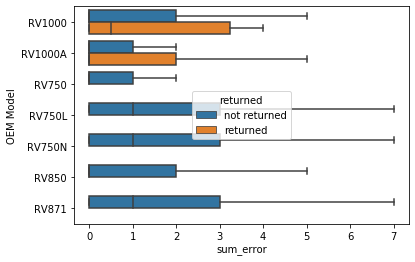

In [342]:
sns.boxplot(x='sum_error',y='OEM Model',hue='returned',data=part1[part1['OEM Model']!='RV750R'].fillna(0),showfliers=False)


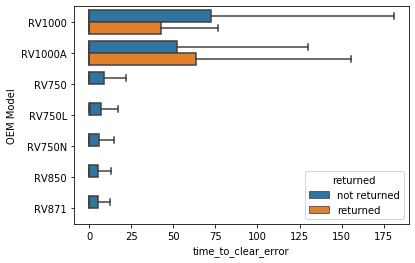

In [343]:
sns.boxplot(x='time_to_clear_error',y='OEM Model',hue='returned',data=part1[part1['OEM Model']!='RV750R'].fillna(0),showfliers=False)



In [239]:
#part1['OEM Model']=='RV1000'
#part1['OEM Model']=='RV1000A'

part1[((part1['totalruntime']==0) | (part1['totalruntime']>=100))&
((part1['max_chargerate']>=0.6)|
(part1['max_dischargerate']<=-0.5)|
(part1['min_chargelevel']<0))&
((part1['sum_error']>=3)|
(part1['time_to_clear_error']>=60))]

,OEM Model,DSN,level_2,sum,count,No Dustbox Error,totalruntime,runfreq,online,chargefreq,...,Side Brush Error time to clear,Side Brush Error#clear,Top Bumper Error,Top Bumper Error time to clear,Top Bumper Error#clear,Error = -1,Error = -1 time to clear,Error = -1#clear,time_to_clear_error,sum_error
34,RV1000,AC000W007209763,0,0.000000,2.000000,NaN,0.0,4.0,7529.683333,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3026.100000,1.0
564,RV1000,AC000W008115460,0,0.000000,2.000000,NaN,0.0,2.0,8889.766667,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.066667,2.0
673,RV1000,AC000W008118962,0,0.000000,1.000000,NaN,0.0,1.0,8879.216667,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,1.0
904,RV1000,AC000W008121398,0,0.000000,2.666667,NaN,0.0,8.0,5033.583333,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.633333,5.0
1163,RV1000,AC000W008126554,0,0.000000,1.000000,2.0,0.0,2.0,8659.450000,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.975000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391327,RV871,AC000W009335973,0,117.500000,4.000000,NaN,235.0,8.0,3126.150000,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.516667,4.0
391341,RV871,AC000W009337849,0,73.250000,3.000000,NaN,293.0,12.0,8901.783333,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383333,8.0
391352,RV871,AC000W009338332,0,44.666667,2.333333,NaN,134.0,7.0,8355.400000,39.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,48.366667,6.0
391355,RV871,AC000W009338526,0,70.333333,1.666667,NaN,211.0,5.0,8661.683333,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.738889,4.0


In [235]:
part1.shape

(391371, 64)

In [241]:
part1['DSN'].count()

391371

In [ ]:
usage timeline
usage profile
clean mode
confidence value
location
charge cycles
error code
reinstall app
more data
delete set_pmvote=1 like set_deletemaps
weekday Mon, Tue, Wed
less than 5min and error
returned units
internal user units
set evacand resume
Get charging status ==False 
True on the dock
time from first dock event to charging status
how to calculate runtime
usage trend
age
successful rate


In [ ]:
# Import the domomagic package into the script 
from domomagic import *
import pandas as pd
import numpy as np
# read data from inputs into a data frame
final_df = read_dataframe('Python Script')
final_df['date']=final_df['Created At'].dt.date# write your script here

final_df['year']=final_df['Created At'].dt.year
#final_df['month']=final_df['Created At'].dt.month

final_df['week']=final_df['Created At'].dt.week

final_df['weekday']=final_df['Created At'].dt.weekday





def fun(data):
    data['created_next']=data['Created At'].shift(-1)
    data['dur']=(data['created_next']-data['Created At']).dt.total_seconds()/60
    
    time=data[data['Property Name']=='RunTimeCycle']
    usagetime=time['Value'].sum()
    usagefreq=time['Value'].count()
    daily=time.groupby('date')['Value'].agg(['sum','count'])
    #print(daily.mean().T)
    #online=(data['Created At'].max()-data['Created At'].min()).total_seconds()/60
    #print('youupypew')
    
    error=data[data['Property Name']=='GET_Error_Code']
    err=error.groupby(['error']).size()
    error['error_next']=error['error'].shift(-1)
    error['dur_err']=(error['Created At'].shift(-1)-error['Created At']).dt.total_seconds()/60

    clear=error[(error['error_next']=='Error = 0')&(error['error']!='Error = 0')]
    #print(error)
#     if len(clear)>0:
#         print( clear.groupby('error')['dur_err'].sum())
    errordur=clear.groupby('error')['dur_err'].sum()
    errordur.index= [i+' time to clear' for i in errordur.index]
    errorfreq=clear.groupby('error')['dur_err'].count()
    errorfreq.index= [i+'#clear' for i in errorfreq.index]
    cap=data[data['Property Name']=='GET_Battery_Capacity']
    cap['rate']=cap['Value'].diff()/cap['Created At'].diff().dt.total_seconds()
    charge=sum(cap['rate']>0)
    discharge=sum(cap['rate']<0)
    if len(cap['rate'].dropna())>0:
        max_charge=max(cap['rate'].dropna())
        maxdischarge=min(cap['rate'].dropna())
    else: 
        max_charge=0
        maxdischarge=0
    
#     version=[data[data['Property Name']=='GET_SCM_FW_Version']['Value'].iloc[0] ,
#     data[data['Property Name']=='GET_WiFi_HW_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Main_PCB_HW_Version']['Value'].iloc[0] ,
#     data[data['Property Name']=='GET_Nav_Module_FW_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Device_Model_Number']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Main_PCB_FW_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Main_PCB_BL_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Nav_Module_HW_Version']['Value'].iloc[0] ,
#     data[data['Property Name']=='GET_Nav_Module_BL_Version']['Value'].iloc[0]]
#     v=pd.DataFrame(version,index=['GET_SCM_FW_Version','GET_WiFi_HW_Version','GET_Main_PCB_HW_Version','GET_Nav_Module_FW_Version',
#                                'GET_Device_Model_Number','GET_Main_PCB_FW_Version','GET_Main_PCB_BL_Version','GET_Nav_Module_HW_Version','GET_Nav_Module_BL_Version'])
		
    #print(a)
    #print(err)
    #print(errordur.T)
    #print(pd.concat([daily.mean().T,err.T,a,errordur.T,errorfreq.T]).T)
    a=pd.DataFrame([usagetime,usagefreq,charge,discharge,max_charge,maxdischarge,
                    cap['Value'].min()],index=['totalruntime','runfreq','chargefreq','dischargefreq',
                                               'max_chargerate','max_dischargerate','min_chargelevel'])
    return pd.concat([daily.mean().T,a,errordur.T,errorfreq.T,err.T]).T

final_df=final_df.groupby(['OEM Model','DSN','year','week']).apply(fun).reset_index()
# write a data frame so it's available to the next action
write_dataframe(final_df)

In [112]:
location=pd.read_csv('location_zone.csv')

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
import geocoder
def getcity(data):
    g = geocoder.osm([data['Lat'],data['Long']], method='reverse')
    try: city=g.json['city']
    except: 
        try: city=g.json['county']
        except: city=''
    
    #print(pd.DataFrame([city,g.json['state'],g.json['country']]))
    #print([city,g.json['state'],g.json['country']])
    try: state=g.json['state']
    except: state=''
    c=pd.DataFrame([city,state,g.json['country']],index=['county','state','country'])
    sleep(3)
    #print(pd.concat([data,c],index=[1]).T)
    return c.T

In [116]:
#location=location.groupby(['DSN','zone']).apply(getcity).reset_index()

In [127]:
final_df['Created At'].min(),final_df['Created At'].max()

(Timestamp('2020-01-28 00:00:00'), Timestamp('2020-02-03 04:50:34'))

In [126]:
final_df['Created At']=pd.to_datetime(final_df['Created At'])

In [128]:
final_df['Created At']

0          2020-02-02 16:35:59
1          2020-02-02 17:00:54
2          2020-02-02 17:02:53
3          2020-02-02 17:02:54
4          2020-02-02 17:02:54
                   ...        
71937676   2020-02-02 20:06:07
71937677   2020-02-02 22:09:41
71937678   2020-02-02 22:10:36
71937679   2020-02-02 22:10:41
71937680   2020-02-02 22:12:56
Name: Created At, Length: 71937681, dtype: datetime64[ns]

In [135]:
missions=pd.read_csv('missions.csv')

In [142]:
missions[missions['DSN']=='AC000W003768926']

,OEM Model,DSN,Property Name,Display Name,Data Type,Created At,User ID,Closed,Discarded,Value,...,event,event_next,error,tag,Property Name next,runs,runtime,job,zone,localtime
772669,RV750,AC000W003768926,Entered Clean Mode,Start/Stop/Home/Pause,integer,2020-01-28 00:08:11,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,2.0,...,"GET_Operating_Mode,2.0,nan","GET_Battery_Capacity,95.0,nan",NaN,NaN,Entered Paused Mode,0.0,8439.0,1.0,America/Chicago,2020-01-27 18:08:11-06:00
772670,RV750,AC000W003768926,Entered Paused Mode,Start/Stop/Home/Pause,integer,2020-01-28 01:09:20,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,0.0,...,"GET_Operating_Mode,0.0,nan","GET_Operating_Mode,3.0,nan",NaN,NaN,Entered Dock Mode,0.0,8439.0,1.0,America/Chicago,2020-01-27 19:09:20-06:00
772671,RV750,AC000W003768926,Entered Dock Mode,Start/Stop/Home/Pause,integer,2020-01-28 01:09:50,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,3.0,...,"SET_Operating_Mode,3.0,nan","GET_Charging_Status,nan,1.0",NaN,NaN,Contacted Charging Dock,0.0,8439.0,1.0,America/Chicago,2020-01-27 19:09:50-06:00
772672,RV750,AC000W003768926,Contacted Charging Dock,Charging Status,boolean,2020-01-28 07:11:51,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,NaN,...,"GET_Charging_Status,nan,1.0","GET_Battery_Capacity,100.0,nan",NaN,NaN,Entered Dock Mode,0.0,8439.0,1.0,America/Chicago,2020-01-28 01:11:51-06:00
772673,RV750,AC000W003768926,Entered Dock Mode,Start/Stop/Home/Pause,integer,2020-01-28 07:11:52,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,3.0,...,"GET_Operating_Mode,3.0,nan","SET_Reset_WiFi,nan,0.0",NaN,NaN,Contacted Charging Dock,0.0,8439.0,1.0,America/Chicago,2020-01-28 01:11:52-06:00
772674,RV750,AC000W003768926,Contacted Charging Dock,Charging Status,boolean,2020-01-28 07:11:52,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,NaN,...,"GET_Charging_Status,nan,1.0","SET_Operating_Mode,3.0,nan",NaN,NaN,Entered Dock Mode,0.0,8439.0,1.0,America/Chicago,2020-01-28 01:11:52-06:00
772675,RV750,AC000W003768926,Entered Dock Mode,Start/Stop/Home/Pause,integer,2020-01-28 07:11:53,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,3.0,...,"SET_Operating_Mode,3.0,nan","SET_Reset_Factory_Defaults,nan,0.0",NaN,NaN,Contacted Charging Dock,0.0,8439.0,1.0,America/Chicago,2020-01-28 01:11:53-06:00
772676,RV750,AC000W003768926,Contacted Charging Dock,Charging Status,boolean,2020-01-28 19:02:20,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,NaN,...,"GET_Charging_Status,nan,1.0","GET_Operating_Mode,3.0,nan",NaN,NaN,Entered Dock Mode,0.0,8439.0,1.0,America/Chicago,2020-01-28 13:02:20-06:00
772677,RV750,AC000W003768926,Entered Dock Mode,Start/Stop/Home/Pause,integer,2020-01-28 19:03:04,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,3.0,...,"GET_Operating_Mode,3.0,nan","GET_Battery_Capacity,100.0,nan",NaN,NaN,Contacted Charging Dock,0.0,8439.0,1.0,America/Chicago,2020-01-28 13:03:04-06:00
772678,RV750,AC000W003768926,Contacted Charging Dock,Charging Status,boolean,2020-01-28 19:03:07,918bb118-77ee-11e8-82cc-0a5d62639812,False,False,NaN,...,"GET_Charging_Status,nan,1.0","SET_Reset_WiFi,nan,0.0",NaN,NaN,Entered Dock Mode,0.0,8439.0,1.0,America/Chicago,2020-01-28 13:03:07-06:00
